# Beaver River diabase and anorthosite xenoliths inclusions in the Beaver Bay Complex Pmag compilation.

This notebook compiles data from our BRD and AX paleomagnetic samples collected in summer 2019, from the Bever Bay Complex.

The BRD samples were treated with step-wise AF demagnetization up to peak field of 130 mT. AX sample b series cores were treated with progressive thermal demagnetization, up to temperature 580 degree C with standard protocol of soaking specimens in the desired peak temperature for 20 minutes, at each heating step.



In [1]:
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from random import randrange
import random
from scipy import special
from scipy import stats
from scipy.optimize import minimize
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats.mstats import mquantiles
import statsmodels.api as sm
import math
from statistics import mean
from statistics import stdev

from IPython.display import display
%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

In [2]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
# import folium
lakes_10m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
Laurentia_outline = ShapelyFeature(Reader('../Data/Laurentia_shape/Laurentia.shp').geometries(),
                                ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')

## BRD and AX site locations

In [3]:
AX_BD_all_site_locations = pd.read_csv('../Data/AX_BRD_site_locations.csv', header = 0)
AX_BD_all_site_locations['color'] = ['red' if i.startswith('AX') else 'blue' for i in AX_BD_all_site_locations['Site']]
display(AX_BD_all_site_locations.head())
display(AX_BD_all_site_locations.tail())

,Site,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,heading,image name,timedate,notes,color
0,AX1,622746.4427,5228715.472,47.200466,-91.379371,15T,242.527710,5,6,6.665518,img_0008.jpg,Thu Jul 25 15:07:07 2019,AX1 drilling holes,red
1,AX10,661202.2988,5272149.391,47.582715,-90.856167,15T,363.645014,5,6,5.305441,img_0007_4.jpg,Mon Jul 29 15:23:16 2019,AX10 3 holes,red
2,AX11,638426.6868,5247910.416,47.369985,-91.166488,15T,226.504679,5,4,314.659668,img_0002_9.jpg,Wed Jul 31 14:51:37 2019,AX11 drill holes,red
3,AX12,631552.7768,5239089.134,47.292066,-91.260100,15T,223.971648,5,3,300.736206,img_0003_9.jpg,Wed Jul 31 16:37:17 2019,AX12-1 to 7 in silver bay,red
4,AX13,638394.3310,5247788.142,47.368892,-91.166955,15T,228.780390,10,8,136.481400,img_0008_5.jpg,Wed Jul 31 19:30:18 2019,AX13-1 to 7,red


,Site,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,heading,image name,timedate,notes,color
34,BD5,631292.7615,5238704.760,47.288661,-91.263650,15T,241.626986,10,24,298.000000,img_0001_12.jpg,Thu Aug 1 13:33:34 2019,BD5 1-8 drill holes,blue
35,BD6,629140.6316,5235850.144,47.263413,-91.292925,15T,210.519075,10,4,296.725494,img_0002_12.jpg,Sat Aug 3 15:02:34 2019,BD6,blue
36,BD7,629476.4291,5236212.911,47.266610,-91.288383,15T,202.235567,10,4,291.000000,img_0003_12.jpg,Sat Aug 3 16:06:23 2019,BD7 drill holes,blue
37,BD8,624473.2153,5230095.306,47.212553,-91.356198,15T,206.878052,5,6,NaN,NaN,Tue Jul 7 09:37:42 2020,BD8,blue
38,BD9,625133.7705,5231409.932,47.224252,-91.347111,15T,211.532959,5,4,NaN,NaN,Tue Jul 7 12:35:25 2020,BD9,blue


In [4]:
AX_site_locations = AX_BD_all_site_locations[AX_BD_all_site_locations['color'] == 'red']
BD_site_locations = AX_BD_all_site_locations[AX_BD_all_site_locations['color'] == 'blue']

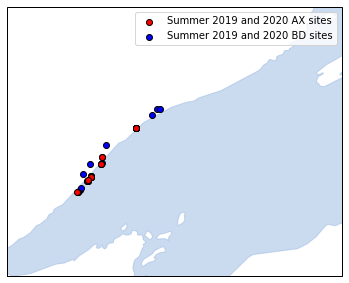

In [5]:
central_lat = 46.8
central_lon = -91
extent = [central_lon-1, central_lon+2, central_lat-0.1, central_lat+1.5]

plt.figure(1, figsize=(6,6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-90, central_latitude=50))
ax.set_extent(extent)

plt.scatter(AX_site_locations[' longitude'], 
           AX_site_locations[' latitude'],
           transform=ccrs.Geodetic(), 
           color = 'red',
           edgecolors='black',
           zorder = 101,
           label='Summer 2019 and 2020 AX sites')

plt.scatter(BD_site_locations[' longitude'], 
           BD_site_locations[' latitude'],
           transform=ccrs.Geodetic(), 
           color = 'blue',
           edgecolors='black',
           zorder = 100,
           label='Summer 2019 and 2020 BD sites')

ax.coastlines(resolution='10m')
ax.add_feature(lakes_10m, alpha=0.5)
plt.legend()
plt.show()

## Load pmag files

In [6]:
AX_BD_site_path = '../Data/Demag/sites.txt'
AX_BD_sample_path = '../Data/Demag/samples.txt'
AX_BD_specimen_path = '../Data/Demag/specimens.txt'
AX_BD_measurements_path = '../Data/Demag/measurements.txt'

AX_BD_site_data = pd.read_csv(AX_BD_site_path, sep='\t',header=1)
AX_BD_sample_data = pd.read_csv(AX_BD_sample_path, sep='\t',header=1)
AX_BD_specimen_data = pd.read_csv(AX_BD_specimen_path, sep='\t',header=1)
AX_BD_measurement_data = pd.read_csv(AX_BD_measurements_path, sep='\t',header=1)

In [7]:
display(AX_BD_site_data.head())

,site,location,samples,specimens,age,age_high,age_low,age_unit,dir_alpha95,dir_comp_name,...,criteria,software_packages,citations,method_codes,result_quality,result_type,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,AX1,Beaver Bay Complex,AX1-1:AX1-2:AX1-3:AX1-4:AX1-5:AX1-6:AX1-7:AX1-8,AX1-1b:AX1-2b:AX1-3b:AX1-4b:AX1-5b:AX1-6b:AX1-...,1092,1091.83,1091.61,Ma,2.4,mt,...,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,3.0,1.8,33.4,180.0
1,AX1,Beaver Bay Complex,AX1-1:AX1-2:AX1-3:AX1-4:AX1-5:AX1-6:AX1-7:AX1-8,AX1-1b:AX1-2b:AX1-3b:AX1-4b:AX1-5b:AX1-6b:AX1-...,1092,1091.83,1091.61,Ma,2.4,mt,...,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,i,3.4,2.3,38.1,190.5
2,AX10,Beaver Bay Complex,AX10-1:AX10-2:AX10-3,AX10-1b:AX10-2b:AX10-3b,1092,1091.83,1091.61,Ma,6.5,mt,...,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,7.1,3.9,20.3,178.5
3,AX10,Beaver Bay Complex,AX10-1:AX10-2:AX10-3,AX10-1b:AX10-2b:AX10-3b,1092,1091.83,1091.61,Ma,6.5,mt,...,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,i,7.6,4.5,21.0,187.6
4,AX11,Beaver Bay Complex,AX11-1:AX11-2:AX11-4:AX11-5:AX11-6:AX11-7:AX11...,AX11-1b:AX11-2b:AX11-4b:AX11-5b:AX11-6b:AX11-7...,1092,1091.83,1091.61,Ma,3.2,mt,...,ACCEPT,pmagpy-4.2.24-1: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,i,3.4,1.8,19.1,176.3


**Site BD14 and BD16 are excluded from further analysis because of large overprints, anomolously strong NRM (e-1 emu) and poor number of good fits within site**

In [8]:
# calculate paleolatitude from the inclination data
AX_BD_site_data['paleolatitude'] = pmag.plat(AX_BD_site_data['dir_inc'])

AX_BD_site_data = AX_BD_site_data.drop(AX_BD_site_data[AX_BD_site_data['site'] == 'BD14'].index)
AX_BD_site_data = AX_BD_site_data.drop(AX_BD_site_data[AX_BD_site_data['site'] == 'BD16'].index)

# filter for the site level mid temp and mid coercivity components before tilt correction 
AX_BD_site_mct = AX_BD_site_data[(AX_BD_site_data['dir_comp_name'].isin(['mc','mt'])) & (AX_BD_site_data['dir_tilt_correction'] == 0)]
AX_BD_site_mct['dir_dec_tc'] = AX_BD_site_mct['dir_dec'] 
AX_BD_site_mct['dir_inc_tc'] = AX_BD_site_mct['dir_inc']
AX_BD_site_mct['vgp_lon_tc'] = AX_BD_site_mct['vgp_lon'] 
AX_BD_site_mct['vgp_lat_tc'] = AX_BD_site_mct['vgp_lat']
# tilt correct diabase site directions with mean diabase orientations (128.5/10.2)
for i, [j, k] in enumerate(zip(AX_BD_site_mct['dir_dec'].tolist(), AX_BD_site_mct['dir_inc'].tolist())):
    AX_BD_site_mct['dir_dec_tc'].iloc[i], AX_BD_site_mct['dir_inc_tc'].iloc[i] = pmag.dotilt(j, k, 128.5, 10.2)
    AX_BD_site_mct['vgp_lon_tc'].iloc[i], AX_BD_site_mct['vgp_lat_tc'].iloc[i], _, _ = pmag.dia_vgp(AX_BD_site_mct['dir_dec_tc'].iloc[i], AX_BD_site_mct['dir_inc_tc'].iloc[i], 
                                                                                                    AX_BD_site_mct['dir_alpha95'].iloc[i], AX_BD_site_mct['lat'].iloc[i], 
                                                                                                    AX_BD_site_mct['lon'].iloc[i])
    
AX_site_mct = AX_BD_site_mct[AX_BD_site_mct['site'].str.startswith('AX')]
BD_site_mct = AX_BD_site_mct[AX_BD_site_mct['site'].str.startswith('BD')]

# filter for the mid temp and mid coercivity components after tilt correction 
AX_BD_site_mct_tc = AX_BD_site_data[(AX_BD_site_data['dir_comp_name'].isin(['mc','mt'])) & (AX_BD_site_data['dir_tilt_correction'] == 100)]
AX_site_mct_tc = AX_BD_site_mct_tc[AX_BD_site_mct_tc['site'].str.startswith('AX')]
BD_site_mct_tc = AX_BD_site_mct_tc[AX_BD_site_mct_tc['site'].str.startswith('BD')]

AX_plat = AX_site_mct_tc[['site', 'paleolatitude']].set_index('site')
BD_plat = BD_site_mct_tc[['site', 'paleolatitude']].set_index('site')

AX_plat = pd.Series(data=AX_plat['paleolatitude'], index=AX_plat.index)
BD_plat = pd.Series(data=BD_plat['paleolatitude'], index=BD_plat.index)

In [9]:
# Load AX site data
AX1 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX1']
AX2 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX2']
AX3 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX3']
AX4 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX4']
AX5 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX5']
AX6 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX6']
AX7 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX7']
AX8 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX8']
AX9 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX9']
AX10 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX10']
AX11 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX11']
AX12 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX12']
AX13 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX13']
AX14 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX14']
AX15 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX15']
AX16 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX16']
AX17 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX17']
AX18 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX18']
AX19 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX19']
AX20 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX20']
AX21 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX21']
AX22 = AX_site_mct_tc[AX_site_mct_tc['site'] == 'AX22']

# combine sites AX5-AX10 into one site since they are all from small AX in Carlton Peak
AX5_AX10 = pd.concat([AX5, AX6, AX7, AX8, AX9, AX10])

# Load BD site data
BD1 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD1']
BD2 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD2']
BD3 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD3']
BD4 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD4']
BD5 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD5']
BD6 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD6']
BD7 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD7']
BD8 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD8']
BD9 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD9']
BD10 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD10']
BD11 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD11']
BD12 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD12']
BD13 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD13']
BD14 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD14']
BD15 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD15']
BD16 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD16']
BD17 = BD_site_mct_tc[BD_site_mct_tc['site'] == 'BD17']

In [10]:
AX_BD_specimen_data.head()

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site
0,AX1-1b,NaN,AX1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,This study,LP-NOMAG,g,NaN,NaN,Beaver Bay Complex,AX1
1,AX1-1b,AX1-1b_LP-DIR-T,AX1-1,NaN,mt,290.5,56.2,1.0,9.0,100.0,...,hargrave 2019-10-25 11:42:49,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Beaver Bay Complex,AX1
2,AX1-1b,AX1-1b_LP-DIR-T,AX1-1,NaN,mt,292.8,45.2,1.0,9.0,0.0,...,hargrave 2019-10-25 11:42:49,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Beaver Bay Complex,AX1
3,AX1-1b,AX1-1b_LP-DIR-T,AX1-1,NaN,mt,215.7,25.5,1.0,9.0,-1.0,...,hargrave 2019-10-25 11:42:49,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR,g,NaN,NaN,Beaver Bay Complex,AX1
4,AX1-1b,NaN,AX1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,This study,LP-NOMAG,g,NaN,NaN,Beaver Bay Complex,AX1


In [166]:
# AX specimen data
AX_specimen_data_pre_tc = AX_BD_specimen_data[(AX_BD_specimen_data.specimen.str.startswith('AX')) & 
                                       (AX_BD_specimen_data.dir_comp.isin(['mc', 'mt'])) & 
                                       (AX_BD_specimen_data.dir_tilt_correction == 0)]

# AX specimen data
AX_specimen_data = AX_BD_specimen_data[(AX_BD_specimen_data.specimen.str.startswith('AX')) & 
                                       (AX_BD_specimen_data.dir_comp.isin(['mc', 'mt'])) & 
                                       (AX_BD_specimen_data.dir_tilt_correction == 100)]
# BD specimen data
BD_specimen_data = AX_BD_specimen_data[(AX_BD_specimen_data.specimen.str.startswith('BD')) & 
                                       (AX_BD_specimen_data.dir_comp.isin(['mc', 'mt'])) & 
                                       (AX_BD_specimen_data.dir_tilt_correction == 100)]

In [12]:
AX5_10specimen_data_pre_tc = AX_specimen_data_pre_tc[AX_specimen_data_pre_tc['specimen'].str.contains('AX5|AX6|AX7|AX8|AX9|AX10')]
display(AX5_10specimen_data_pre_tc.head())

AX5_10specimen_data = AX_specimen_data[AX_specimen_data['specimen'].str.contains('AX5|AX6|AX7|AX8|AX9|AX10')]
display(AX5_10specimen_data.head())

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site
51,AX10-1b,AX10-1b_LP-DIR-T,AX10-1,NaN,mt,282.6,28.6,1.0,17.0,0.0,...,hargrave 2019-12-02 18:20:18,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Beaver Bay Complex,AX10
56,AX10-2b,AX10-2b_LP-DIR-T,AX10-2,NaN,mt,282.2,28.9,1.0,16.0,0.0,...,hargrave 2019-12-02 18:21:50,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Beaver Bay Complex,AX10
64,AX10-3b,AX10-3b_LP-DIR-T,AX10-3,NaN,mt,288.6,23.9,1.0,10.0,0.0,...,hargrave 2019-12-02 18:23:19,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Beaver Bay Complex,AX10
791,AX5-1b,AX5-1b_LP-DIR-T,AX5-1,NaN,mt,289.0,30.8,1.0,17.0,0.0,...,hargrave 2019-12-02 17:59:36,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Beaver Bay Complex,AX5
795,AX5-3b,AX5-3b_LP-DIR-T,AX5-3,NaN,mt,292.6,25.2,1.0,12.0,0.0,...,hargrave 2019-12-02 18:01:09,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Beaver Bay Complex,AX5


,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site
50,AX10-1b,AX10-1b_LP-DIR-T,AX10-1,NaN,mt,276.3,38.5,1.0,17.0,100.0,...,hargrave 2019-12-02 18:20:18,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Beaver Bay Complex,AX10
54,AX10-2b,AX10-2b_LP-DIR-T,AX10-2,NaN,mt,275.7,38.8,1.0,16.0,100.0,...,hargrave 2019-12-02 18:21:50,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Beaver Bay Complex,AX10
65,AX10-3b,AX10-3b_LP-DIR-T,AX10-3,NaN,mt,283.9,34.8,1.0,10.0,100.0,...,hargrave 2019-12-02 18:23:19,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Beaver Bay Complex,AX10
789,AX5-1b,AX5-1b_LP-DIR-T,AX5-1,NaN,mt,282.9,41.7,1.0,17.0,100.0,...,hargrave 2019-12-02 17:59:36,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Beaver Bay Complex,AX5
796,AX5-3b,AX5-3b_LP-DIR-T,AX5-3,NaN,mt,288.1,36.7,1.0,12.0,100.0,...,hargrave 2019-12-02 18:01:09,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Beaver Bay Complex,AX5


In [13]:
site_AX5_10_dir_pre_tc = ipmag.fisher_mean(AX5_10specimen_data_pre_tc['dir_dec'].tolist(), AX5_10specimen_data_pre_tc['dir_inc'].tolist())
site_AX5_10_dir_tc = pmag.dotilt(site_AX5_10_dir_pre_tc['dec'], site_AX5_10_dir_pre_tc['inc'], 128.5, 10.2)
# ipmag.print_direction_mean(site_AX5_10_dir_pre_tc)

site_AX5_10_pole_pre_tc = pmag.dia_vgp(site_AX5_10_dir_pre_tc['dec'], site_AX5_10_dir_pre_tc['inc'], site_AX5_10_dir_pre_tc['alpha95'], 47.5827, -90.8562)
site_AX5_10_pole_tc = pmag.dia_vgp(site_AX5_10_dir_tc[0], site_AX5_10_dir_tc[1], site_AX5_10_dir_pre_tc['alpha95'], 47.5827, -90.8562)

In [14]:
AX_site_mct = AX_site_mct.drop(AX_site_mct[AX_site_mct['site']=='AX5'].index)
AX_site_mct = AX_site_mct.drop(AX_site_mct[AX_site_mct['site']=='AX6'].index)
AX_site_mct = AX_site_mct.drop(AX_site_mct[AX_site_mct['site']=='AX7'].index)
AX_site_mct = AX_site_mct.drop(AX_site_mct[AX_site_mct['site']=='AX8'].index)
AX_site_mct = AX_site_mct.drop(AX_site_mct[AX_site_mct['site']=='AX9'].index)
AX_site_mct = AX_site_mct.drop(AX_site_mct[AX_site_mct['site']=='AX10'].index)

AX_site_mct = AX_site_mct.append({'site': 'AX5-10', 
                        'location': 'Beaver Bay Complex', 
                        'samples': 'AX5-1:AX5-3:AX6-1:AX6-2:AX6-3:AX7-1:AX7-2:AX8-1:AX8-2:AX8-3:AX9-1:AX10-1:AX10-2:AX10-3', 
                        'specimens':'AX5-1b:AX5-3b:AX6-1b:AX6-2b:AX6-3b:AX7-1b:AX7-2b:AX8-1b:AX8-2b:AX8-3b:AX9-1b:AX10-1b:AX10-2b:AX10-3b',
                        'dir_alpha95': 2.5, 
                        'dir_comp_name': 'mt', 
                        'dir_dec': site_AX5_10_dir_pre_tc['dec'], 
                        'dir_inc': site_AX5_10_dir_pre_tc['inc'], 
                        'dir_k':site_AX5_10_dir_pre_tc['k'], 
                        'dir_n_samples': site_AX5_10_dir_pre_tc['n'], 
                        'dir_n_specimens':site_AX5_10_dir_pre_tc['n'], 
                        'dir_n_specimens_lines': site_AX5_10_dir_pre_tc['n'], 'dir_n_specimens_planes':0, 'dir_polarity':'t',
                        'dir_r': site_AX5_10_dir_pre_tc['r'], 
                        'dir_tilt_correction': 0, 
                        'lat':47.5827, 'lon':-90.8562, 
                        'analysts':'Yiming Zhang', 
                        'criteria':'ACCEPT', 
                        'software_packages':'pmagpy-4.2.24-1: demag_gui.v.3.0',
                        'citations':'This study', 
                        'method_codes':'LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM', 
                        'result_quality':'g',
                        'vgp_dm': site_AX5_10_pole_pre_tc[3], 'vgp_dp':site_AX5_10_pole_pre_tc[2], 
                        'vgp_lat':site_AX5_10_pole_pre_tc[1], 'vgp_lon':site_AX5_10_pole_pre_tc[0], 
                        'paleolatitude': pmag.plat(site_AX5_10_dir_pre_tc['inc']), 
                        'dir_dec_tc':site_AX5_10_dir_tc[0], 'dir_inc_tc':site_AX5_10_dir_tc[1], 
                        'vgp_lon_tc':site_AX5_10_pole_tc[0], 'vgp_lat_tc':site_AX5_10_pole_tc[1]}, ignore_index=True)
AX_site_mct.tail()

,site,location,samples,specimens,age,age_high,age_low,age_unit,dir_alpha95,dir_comp_name,...,result_type,vgp_dm,vgp_dp,vgp_lat,vgp_lon,paleolatitude,dir_dec_tc,dir_inc_tc,vgp_lon_tc,vgp_lat_tc
12,AX21,Beaver Bay Complex,AX21-1:AX21-2:AX21-3:AX21-4:AX21-5:AX21-6:AX21...,AX21-1b:AX21-2b:AX21-3b:AX21-4b:AX21-5b:AX21-6...,1092.0,1091.83,1091.61,Ma,2.0,mt,...,i,2.400000,1.400000,36.700000,170.400000,21.128721,300.480435,47.815835,178.828094,41.011763
13,AX22,Beaver Bay Complex,AX22-10:AX22-1:AX22-2:AX22-3:AX22-5:AX22-6:AX2...,AX22-10a:AX22-1a:AX22-2a:AX22-3a:AX22-5a:AX22-...,1092.0,1091.83,1091.61,Ma,3.6,mt,...,i,4.500000,2.800000,36.300000,177.600000,25.074505,294.727462,53.060364,187.728952,40.045022
14,AX3,Beaver Bay Complex,AX3-10:AX3-1:AX3-2:AX3-3:AX3-4:AX3-5:AX3-6:AX3...,AX3-10b:AX3-1b:AX3-2b:AX3-3b:AX3-4b:AX3-5b:AX3...,1092.0,1091.83,1091.61,Ma,6.2,mt,...,i,6.800000,3.700000,24.700000,174.300000,14.887976,288.343778,37.644170,180.820916,27.627010
15,AX4,Beaver Bay Complex,AX4-1:AX4-2:AX4-3:AX4-4:AX4-5:AX4-7:AX4-8,AX4-1b:AX4-2b:AX4-3b:AX4-4b:AX4-5b:AX4-7b:AX4-8b,1092.0,1091.83,1091.61,Ma,6.4,mt,...,i,6.700000,3.500000,22.300000,169.800000,10.314105,290.489747,29.741296,175.129743,25.455807
16,AX5-10,Beaver Bay Complex,AX5-1:AX5-3:AX6-1:AX6-2:AX6-3:AX7-1:AX7-2:AX8-...,AX5-1b:AX5-3b:AX6-1b:AX6-2b:AX6-3b:AX7-1b:AX7-...,NaN,NaN,NaN,NaN,2.5,mt,...,NaN,2.673992,1.473933,22.254897,178.071517,15.540162,283.418071,38.426883,184.795121,24.690130


In [15]:
site_AX5_10_dir = ipmag.fisher_mean(AX5_10specimen_data['dir_dec'].tolist(), AX5_10specimen_data['dir_inc'].tolist())
ipmag.print_direction_mean(site_AX5_10_dir)

site_AX5_10_pole = pmag.dia_vgp(site_AX5_10_dir['dec'], site_AX5_10_dir['inc'], site_AX5_10_dir['alpha95'], 47.5827, -90.8562)
site_AX5_10_pole

Dec: 280.6  Inc: 38.8
Number of directions in mean (n): 14
Angular radius of 95% confidence (a_95): 3.1
Precision parameter (k) estimate: 164.3


(187.00450616753642, 22.967583911732167, 2.2044738143442184, 3.703280957872813)

In [16]:
AX_site_mct_tc = AX_site_mct_tc.drop(AX_site_mct_tc[AX_site_mct_tc['site']=='AX5'].index)
AX_site_mct_tc = AX_site_mct_tc.drop(AX_site_mct_tc[AX_site_mct_tc['site']=='AX6'].index)
AX_site_mct_tc = AX_site_mct_tc.drop(AX_site_mct_tc[AX_site_mct_tc['site']=='AX7'].index)
AX_site_mct_tc = AX_site_mct_tc.drop(AX_site_mct_tc[AX_site_mct_tc['site']=='AX8'].index)
AX_site_mct_tc = AX_site_mct_tc.drop(AX_site_mct_tc[AX_site_mct_tc['site']=='AX9'].index)
AX_site_mct_tc = AX_site_mct_tc.drop(AX_site_mct_tc[AX_site_mct_tc['site']=='AX10'].index)

AX_site_mct_tc = AX_site_mct_tc.append({'site': 'AX5-10', 
                        'location': 'Beaver Bay Complex', 
                        'samples': 'AX5-1:AX5-3:AX6-1:AX6-2:AX6-3:AX7-1:AX7-2:AX8-1:AX8-2:AX8-3:AX9-1:AX10-1:AX10-2:AX10-3', 
                        'specimens':'AX5-1b:AX5-3b:AX6-1b:AX6-2b:AX6-3b:AX7-1b:AX7-2b:AX8-1b:AX8-2b:AX8-3b:AX9-1b:AX10-1b:AX10-2b:AX10-3b',
                        'dir_alpha95': 2.5, 
                        'dir_comp_name': 'mt', 
                        'dir_dec': site_AX5_10_dir['dec'], 
                        'dir_inc': site_AX5_10_dir['inc'], 
                        'dir_k':site_AX5_10_dir['k'], 
                        'dir_n_samples': site_AX5_10_dir['n'], 
                        'dir_n_specimens':site_AX5_10_dir['n'], 
                        'dir_n_specimens_lines': site_AX5_10_dir['n'], 'dir_n_specimens_planes':0, 'dir_polarity':'t',
                        'dir_r': site_AX5_10_dir['r'], 
                        'dir_tilt_correction': 100, 
                        'lat':47.5827, 'lon':-90.8562, 
                        'analysts':'Yiming Zhang', 
                        'criteria':'ACCEPT', 
                        'software_packages':'pmagpy-4.2.24-1: demag_gui.v.3.0',
                        'citations':'This study', 
                        'method_codes':'LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM', 
                        'result_quality':'g',
                        'vgp_dm': site_AX5_10_pole[3], 'vgp_dp':site_AX5_10_pole[2], 
                        'vgp_lat':site_AX5_10_pole[1], 'vgp_lon':site_AX5_10_pole[0], 
                        'palelatitude':pmag.plat(site_AX5_10_dir['inc'])}, ignore_index=True)
AX_site_mct_tc.tail()

,site,location,samples,specimens,age,age_high,age_low,age_unit,dir_alpha95,dir_comp_name,...,citations,method_codes,result_quality,result_type,vgp_dm,vgp_dp,vgp_lat,vgp_lon,paleolatitude,palelatitude
12,AX21,Beaver Bay Complex,AX21-1:AX21-2:AX21-3:AX21-4:AX21-5:AX21-6:AX21...,AX21-1b:AX21-2b:AX21-3b:AX21-4b:AX21-5b:AX21-6...,1092.0,1091.83,1091.61,Ma,2.0,mt,...,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,i,2.600000,1.700000,42.500000,179.000000,29.906833,NaN
13,AX22,Beaver Bay Complex,AX22-10:AX22-1:AX22-2:AX22-3:AX22-5:AX22-6:AX2...,AX22-10a:AX22-1a:AX22-2a:AX22-3a:AX22-5a:AX22-...,1092.0,1091.83,1091.61,Ma,3.6,mt,...,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,i,5.100000,3.600000,41.700000,188.100000,34.831109,NaN
14,AX3,Beaver Bay Complex,AX3-10:AX3-1:AX3-2:AX3-3:AX3-4:AX3-5:AX3-6:AX3...,AX3-10b:AX3-1b:AX3-2b:AX3-3b:AX3-4b:AX3-5b:AX3...,1092.0,1091.83,1091.61,Ma,6.2,mt,...,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,i,7.400000,4.400000,26.200000,183.900000,22.113824,NaN
15,AX4,Beaver Bay Complex,AX4-1:AX4-2:AX4-3:AX4-4:AX4-5:AX4-7:AX4-8,AX4-1b:AX4-2b:AX4-3b:AX4-4b:AX4-5b:AX4-7b:AX4-8b,1092.0,1091.83,1091.61,Ma,6.4,mt,...,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,i,7.200000,4.000000,24.700000,177.700000,17.035085,NaN
16,AX5-10,Beaver Bay Complex,AX5-1:AX5-3:AX6-1:AX6-2:AX6-3:AX7-1:AX7-2:AX8-...,AX5-1b:AX5-3b:AX6-1b:AX6-2b:AX6-3b:AX7-1b:AX7-...,NaN,NaN,NaN,NaN,2.5,mt,...,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,NaN,3.703281,2.204474,22.967584,187.004506,NaN,21.901485


In [167]:
# Load specimen data for common mean test
BD1_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:4]=='BD1-']
BD2_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:4]=='BD2-']
BD3_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:4]=='BD3-']
BD4_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:4]=='BD4-']
BD5_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:4]=='BD5-']
BD6_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:4]=='BD6-']
BD7_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:4]=='BD7-']
BD8_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:4]=='BD8-']
BD9_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:4]=='BD9-']
BD10_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:5]=='BD10-']
BD11_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:5]=='BD11-']
BD12_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:5]=='BD12-']
BD13_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:5]=='BD13-']
BD14_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:5]=='BD14-']
BD15_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:5]=='BD15-']
BD16_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:5]=='BD16-']
BD17_specs = BD_specimen_data[BD_specimen_data['specimen'].str[:5]=='BD17-']

BD1_blocks = ipmag.make_di_block(BD1_specs.dir_dec.tolist(), BD1_specs.dir_inc.tolist())
BD2_blocks = ipmag.make_di_block(BD2_specs.dir_dec.tolist(), BD2_specs.dir_inc.tolist())
BD3_blocks = ipmag.make_di_block(BD3_specs.dir_dec.tolist(), BD3_specs.dir_inc.tolist())
BD4_blocks = ipmag.make_di_block(BD4_specs.dir_dec.tolist(), BD4_specs.dir_inc.tolist())
BD5_blocks = ipmag.make_di_block(BD5_specs.dir_dec.tolist(), BD5_specs.dir_inc.tolist())
BD6_blocks = ipmag.make_di_block(BD6_specs.dir_dec.tolist(), BD6_specs.dir_inc.tolist())
BD7_blocks = ipmag.make_di_block(BD7_specs.dir_dec.tolist(), BD7_specs.dir_inc.tolist())
BD10_blocks = ipmag.make_di_block(BD10_specs.dir_dec.tolist(), BD10_specs.dir_inc.tolist())

AX1_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:4]=='AX1-']
AX2_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:4]=='AX2-']
AX3_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:4]=='AX3-']
AX4_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:4]=='AX4-']
AX5_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:4]=='AX5-']
AX6_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:4]=='AX6-']
AX7_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:4]=='AX7-']
AX8_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:4]=='AX8-']
AX9_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:4]=='AX9-']
AX10_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX10-']
AX11_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX11-']
AX12_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX12-']
AX13_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX13-']
AX14_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX14-']
AX15_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX15-']
AX16_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX16-']
AX17_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX17-']
AX18_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX18-']
AX19_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX19-']
AX20_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX20-']
AX21_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX21-']
AX22_specs = AX_specimen_data[AX_specimen_data['specimen'].str[:5]=='AX22-']

AX1_blocks = ipmag.make_di_block(AX1_specs.dir_dec.tolist(), AX1_specs.dir_inc.tolist())
AX2_blocks = ipmag.make_di_block(AX2_specs.dir_dec.tolist(), AX2_specs.dir_inc.tolist())
AX3_blocks = ipmag.make_di_block(AX3_specs.dir_dec.tolist(), AX3_specs.dir_inc.tolist())
AX4_blocks = ipmag.make_di_block(AX4_specs.dir_dec.tolist(), AX4_specs.dir_inc.tolist())
AX5_blocks = ipmag.make_di_block(AX5_specs.dir_dec.tolist(), AX5_specs.dir_inc.tolist())
AX6_blocks = ipmag.make_di_block(AX6_specs.dir_dec.tolist(), AX6_specs.dir_inc.tolist())
AX7_blocks = ipmag.make_di_block(AX7_specs.dir_dec.tolist(), AX7_specs.dir_inc.tolist())
AX8_blocks = ipmag.make_di_block(AX8_specs.dir_dec.tolist(), AX8_specs.dir_inc.tolist())
AX10_blocks = ipmag.make_di_block(AX10_specs.dir_dec.tolist(), AX10_specs.dir_inc.tolist())

# make site 5 to 10 dec and inc into one same block
AX5_10_blocks = ipmag.make_di_block(AX5_10specimen_data['dir_dec'].tolist(), AX5_10specimen_data['dir_inc'].tolist())

AX11_blocks = ipmag.make_di_block(AX11_specs.dir_dec.tolist(), AX11_specs.dir_inc.tolist())
AX12_blocks = ipmag.make_di_block(AX12_specs.dir_dec.tolist(), AX12_specs.dir_inc.tolist())
AX13_blocks = ipmag.make_di_block(AX13_specs.dir_dec.tolist(), AX13_specs.dir_inc.tolist())
AX14_blocks = ipmag.make_di_block(AX14_specs.dir_dec.tolist(), AX14_specs.dir_inc.tolist())
AX15_blocks = ipmag.make_di_block(AX15_specs.dir_dec.tolist(), AX15_specs.dir_inc.tolist())
AX16_blocks = ipmag.make_di_block(AX16_specs.dir_dec.tolist(), AX16_specs.dir_inc.tolist())
AX17_blocks = ipmag.make_di_block(AX17_specs.dir_dec.tolist(), AX17_specs.dir_inc.tolist())
AX18_blocks = ipmag.make_di_block(AX18_specs.dir_dec.tolist(), AX18_specs.dir_inc.tolist())
AX19_blocks = ipmag.make_di_block(AX19_specs.dir_dec.tolist(), AX19_specs.dir_inc.tolist())
AX20_blocks = ipmag.make_di_block(AX20_specs.dir_dec.tolist(), AX20_specs.dir_inc.tolist())
AX21_blocks = ipmag.make_di_block(AX21_specs.dir_dec.tolist(), AX21_specs.dir_inc.tolist())
AX22_blocks = ipmag.make_di_block(AX22_specs.dir_dec.tolist(), AX22_specs.dir_inc.tolist())

## Plot pmag directions and VGPs

In [19]:
# mean direction pre tilt correction
AX_site_mct_mean = ipmag.fisher_mean(AX_site_mct['dir_dec'].tolist(), AX_site_mct['dir_inc'].tolist())
BD_site_mct_mean = ipmag.fisher_mean(BD_site_mct['dir_dec'].tolist(), BD_site_mct['dir_inc'].tolist())

# mean direction with tilt correction (128.5,10.2)
AX_site_mct_mean_tc = ipmag.fisher_mean(AX_site_mct['dir_dec_tc'].tolist(), AX_site_mct['dir_inc_tc'].tolist())
BD_site_mct_mean_tc = ipmag.fisher_mean(BD_site_mct['dir_dec_tc'].tolist(), BD_site_mct['dir_inc_tc'].tolist())

# mean direction post tilt correction
AX_site_mct_tc_mean = ipmag.fisher_mean(AX_site_mct_tc['dir_dec'].tolist(), AX_site_mct_tc['dir_inc'].tolist())
BD_site_mct_tc_mean = ipmag.fisher_mean(BD_site_mct_tc['dir_dec'].tolist(), BD_site_mct_tc['dir_inc'].tolist())


ipmag.print_direction_mean(AX_site_mct_mean)
ipmag.print_direction_mean(BD_site_mct_mean)
print()
ipmag.print_direction_mean(AX_site_mct_mean_tc)
ipmag.print_direction_mean(BD_site_mct_mean_tc)
print()
ipmag.print_direction_mean(AX_site_mct_tc_mean)
ipmag.print_direction_mean(BD_site_mct_tc_mean)

Dec: 289.3  Inc: 36.5
Number of directions in mean (n): 17
Angular radius of 95% confidence (a_95): 4.9
Precision parameter (k) estimate: 54.9
Dec: 291.0  Inc: 35.8
Number of directions in mean (n): 15
Angular radius of 95% confidence (a_95): 6.8
Precision parameter (k) estimate: 32.8

Dec: 286.1  Inc: 46.0
Number of directions in mean (n): 17
Angular radius of 95% confidence (a_95): 4.9
Precision parameter (k) estimate: 54.9
Dec: 288.2  Inc: 45.5
Number of directions in mean (n): 15
Angular radius of 95% confidence (a_95): 6.8
Precision parameter (k) estimate: 32.8

Dec: 286.3  Inc: 47.4
Number of directions in mean (n): 17
Angular radius of 95% confidence (a_95): 4.9
Precision parameter (k) estimate: 54.8
Dec: 288.8  Inc: 46.9
Number of directions in mean (n): 15
Angular radius of 95% confidence (a_95): 6.7
Precision parameter (k) estimate: 33.8


In [20]:
# mean VGP pre tilt correction
AX_site_vgp_mean = ipmag.fisher_mean(AX_site_mct['vgp_lon'].tolist(), AX_site_mct['vgp_lat'].tolist())
BD_site_vgp_mean = ipmag.fisher_mean(BD_site_mct['vgp_lon'].tolist(), BD_site_mct['vgp_lat'].tolist())

# mean VGP pre tilt correction
AX_site_vgp_mean_tc = ipmag.fisher_mean(AX_site_mct['vgp_lon_tc'].tolist(), AX_site_mct['vgp_lat_tc'].tolist())
BD_site_vgp_mean_tc = ipmag.fisher_mean(BD_site_mct['vgp_lon_tc'].tolist(), BD_site_mct['vgp_lat_tc'].tolist())

# mean VGP post tilt correction
AX_site_vgp_tc_mean = ipmag.fisher_mean(AX_site_mct_tc['vgp_lon'].tolist(), AX_site_mct_tc['vgp_lat'].tolist())
BD_site_vgp_tc_mean = ipmag.fisher_mean(BD_site_mct_tc['vgp_lon'].tolist(), BD_site_mct_tc['vgp_lat'].tolist())


ipmag.print_pole_mean(AX_site_vgp_mean)
ipmag.print_pole_mean(BD_site_vgp_mean)

ipmag.print_pole_mean(AX_site_vgp_tc_mean)
ipmag.print_pole_mean(BD_site_vgp_tc_mean)

Plon: 179.6  Plat: 28.0
Number of directions in mean (n): 17
Angular radius of 95% confidence (A_95): 4.3
Precision parameter (k) estimate: 70.6
Plon: 178.2  Plat: 29.1
Number of directions in mean (n): 15
Angular radius of 95% confidence (A_95): 5.2
Precision parameter (k) estimate: 55.7
Plon: 189.0  Plat: 31.6
Number of directions in mean (n): 17
Angular radius of 95% confidence (A_95): 5.0
Precision parameter (k) estimate: 51.6
Plon: 187.5  Plat: 33.3
Number of directions in mean (n): 15
Angular radius of 95% confidence (A_95): 6.1
Precision parameter (k) estimate: 40.7


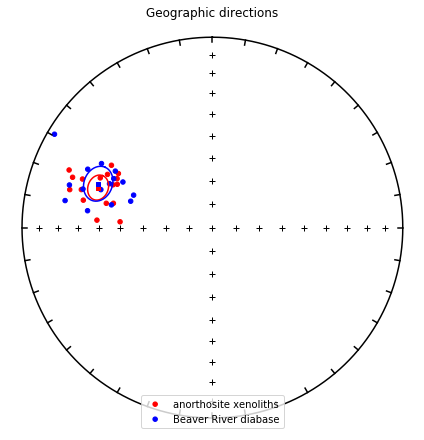

In [21]:
# pre tilt correction site mean directions
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di(AX_site_mct['dir_dec'].tolist(), AX_site_mct['dir_inc'].tolist(), color = 'red', label = 'anorthosite xenoliths')
ipmag.plot_di(BD_site_mct['dir_dec'].tolist(), BD_site_mct['dir_inc'].tolist(), color = 'blue', label = 'Beaver River diabase')

ipmag.plot_di_mean(AX_site_mct_mean['dec'],AX_site_mct_mean['inc'],AX_site_mct_mean['alpha95'],
                   color='red', marker = 's')
ipmag.plot_di_mean(BD_site_mct_mean['dec'],BD_site_mct_mean['inc'],BD_site_mct_mean['alpha95'],
                   color='blue', marker = 's')
plt.legend(loc=8)
plt.title('Geographic directions')
# plt.savefig('../Figure/Pmag_plots/AX_BD_site_mean_directions_gc.pdf', bbox_inches='tight')
plt.show()

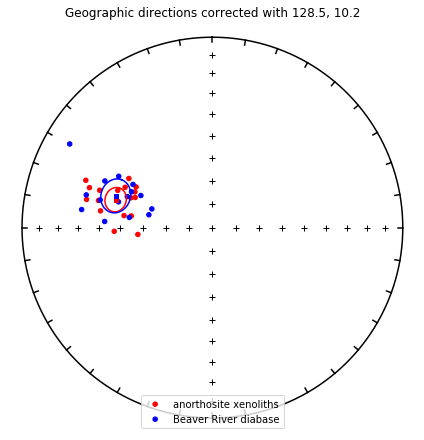

In [22]:
# pre tilt correction site mean directions
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di(AX_site_mct['dir_dec_tc'].tolist(), AX_site_mct['dir_inc_tc'].tolist(), color = 'red', label = 'anorthosite xenoliths')
ipmag.plot_di(BD_site_mct['dir_dec_tc'].tolist(), BD_site_mct['dir_inc_tc'].tolist(), color = 'blue', label = 'Beaver River diabase')

ipmag.plot_di_mean(AX_site_mct_mean_tc['dec'],AX_site_mct_mean_tc['inc'],AX_site_mct_mean_tc['alpha95'],
                   color='red', marker = 's')
ipmag.plot_di_mean(BD_site_mct_mean_tc['dec'],BD_site_mct_mean_tc['inc'],BD_site_mct_mean_tc['alpha95'],
                   color='blue', marker = 's')
plt.legend(loc=8)
plt.title('Geographic directions corrected with 128.5, 10.2')
# plt.savefig('../Figure/Pmag_plots/AX_BD_site_mean_directions_gc.pdf', bbox_inches='tight')
plt.show()

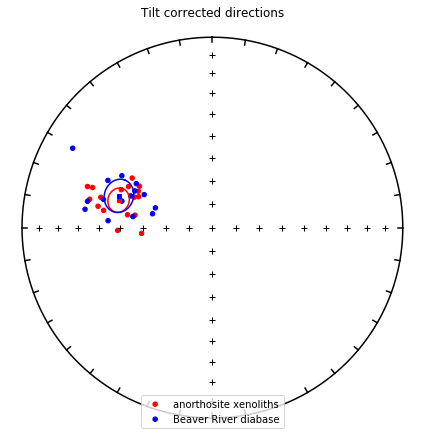

In [23]:
# post tilt correction site mean directions
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di(AX_site_mct_tc['dir_dec'].tolist(), AX_site_mct_tc['dir_inc'].tolist(), color = 'red', label = 'anorthosite xenoliths')
ipmag.plot_di(BD_site_mct_tc['dir_dec'].tolist(), BD_site_mct_tc['dir_inc'].tolist(), color = 'blue', label = 'Beaver River diabase')

ipmag.plot_di_mean(AX_site_mct_tc_mean['dec'],AX_site_mct_tc_mean['inc'],AX_site_mct_tc_mean['alpha95'],
                   color='red', marker = 's')
ipmag.plot_di_mean(BD_site_mct_tc_mean['dec'],BD_site_mct_tc_mean['inc'],BD_site_mct_tc_mean['alpha95'],
                   color='blue', marker = 's')
plt.legend(loc=8)
plt.title('Tilt corrected directions')
# plt.savefig('../Figure/Pmag_plots/AX_BD_site_mean_directions_tc.pdf', bbox_inches='tight')
plt.show()

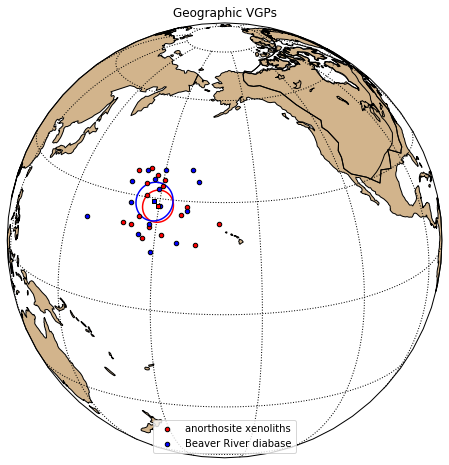

In [24]:
# pre tilt correction VGPs
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
map_axis.add_feature(Laurentia_outline)

ipmag.plot_vgp(map_axis, AX_site_mct['vgp_lon'].tolist(), AX_site_mct['vgp_lat'].tolist(), 
               color = 'red', label = 'anorthosite xenoliths')
ipmag.plot_vgp(map_axis, BD_site_mct['vgp_lon'].tolist(), BD_site_mct['vgp_lat'].tolist(), 
               color = 'blue', label = 'Beaver River diabase')

ipmag.plot_pole(map_axis, AX_site_vgp_mean['dec'], AX_site_vgp_mean['inc'], AX_site_vgp_mean['alpha95'], 
                color = 'red', marker = 's')
ipmag.plot_pole(map_axis, BD_site_vgp_mean['dec'], BD_site_vgp_mean['inc'], BD_site_vgp_mean['alpha95'], 
                color = 'blue', marker = 's')
plt.legend(loc=8)
plt.title('Geographic VGPs')
# plt.savefig('../Figure/Pmag_plots/AX_BD_site_VGPs.pdf')
plt.show()

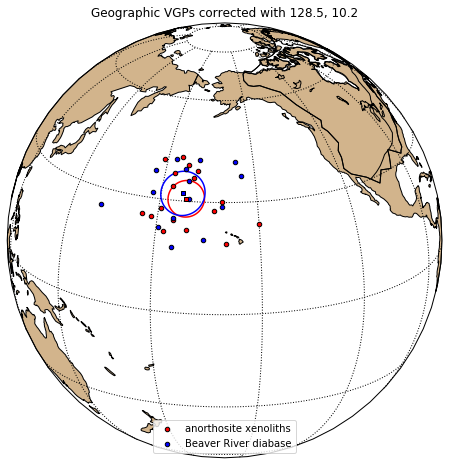

In [25]:
# pre tilt correction VGPs
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
map_axis.add_feature(Laurentia_outline)

ipmag.plot_vgp(map_axis, AX_site_mct['vgp_lon_tc'].tolist(), AX_site_mct['vgp_lat_tc'].tolist(), 
               color = 'red', label = 'anorthosite xenoliths')
ipmag.plot_vgp(map_axis, BD_site_mct['vgp_lon_tc'].tolist(), BD_site_mct['vgp_lat_tc'].tolist(), 
               color = 'blue', label = 'Beaver River diabase')

ipmag.plot_pole(map_axis, AX_site_vgp_mean_tc['dec'], AX_site_vgp_mean_tc['inc'], AX_site_vgp_mean_tc['alpha95'], 
                color = 'red', marker = 's')
ipmag.plot_pole(map_axis, BD_site_vgp_mean_tc['dec'], BD_site_vgp_mean_tc['inc'], BD_site_vgp_mean_tc['alpha95'], 
                color = 'blue', marker = 's')
plt.legend(loc=8)
plt.title('Geographic VGPs corrected with 128.5, 10.2')
# plt.savefig('../Figure/Pmag_plots/AX_BD_site_VGPs.pdf')
plt.show()

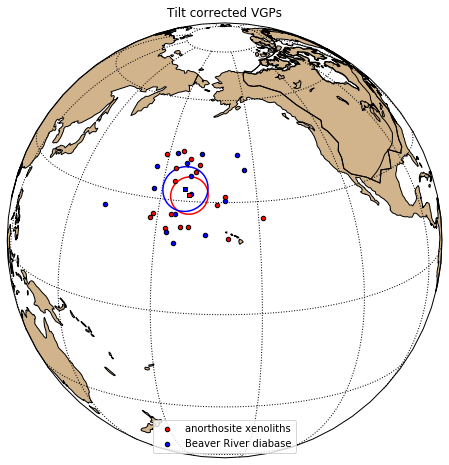

In [26]:
# post tilt correction VGPs
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
map_axis.add_feature(Laurentia_outline)

ipmag.plot_vgp(map_axis, AX_site_mct_tc['vgp_lon'].tolist(), AX_site_mct_tc['vgp_lat'].tolist(), 
               color = 'red', label = 'anorthosite xenoliths')
ipmag.plot_vgp(map_axis, BD_site_mct_tc['vgp_lon'].tolist(), BD_site_mct_tc['vgp_lat'].tolist(), 
               color = 'blue', label = 'Beaver River diabase')

ipmag.plot_pole(map_axis, AX_site_vgp_tc_mean['dec'], AX_site_vgp_tc_mean['inc'], AX_site_vgp_tc_mean['alpha95'], 
                color = 'red', marker = 's')
ipmag.plot_pole(map_axis, BD_site_vgp_tc_mean['dec'], BD_site_vgp_tc_mean['inc'], BD_site_vgp_tc_mean['alpha95'], 
                color = 'blue', marker = 's')

plt.legend(loc=8)
plt.title('Tilt corrected VGPs')
# plt.savefig('../Figure/Pmag_plots/AX_BD_site_VGPs_tc.pdf')
plt.show()

## Plot AX and BD VGPs in context of interted MCR poles

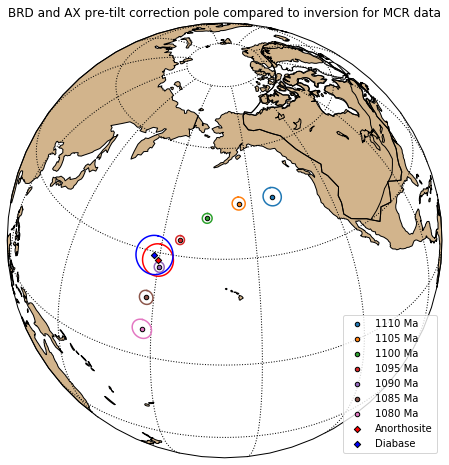

In [27]:
one_Euler_pole_lon = np.loadtxt('../Data/mcplates_results/pole_lon_positions1.txt')
one_Euler_pole_lat = np.loadtxt('../Data/mcplates_results/pole_lat_positions1.txt')

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, AX_site_vgp_mean['dec'], AX_site_vgp_mean['inc'], AX_site_vgp_mean['alpha95'], marker = 'D', color = 'red', label = 'Anorthosite')
ipmag.plot_pole(m, BD_site_vgp_mean['dec'], BD_site_vgp_mean['inc'], BD_site_vgp_mean['alpha95'], marker = 'D', color = 'blue', label = 'Diabase')

plt.legend(loc = 4)
plt.title('BRD and AX pre-tilt correction pole compared to inversion for MCR data')
# plt.savefig('../Figure/Pmag_plots/BRD_AX_Keweenawan_1e.pdf')
plt.show()

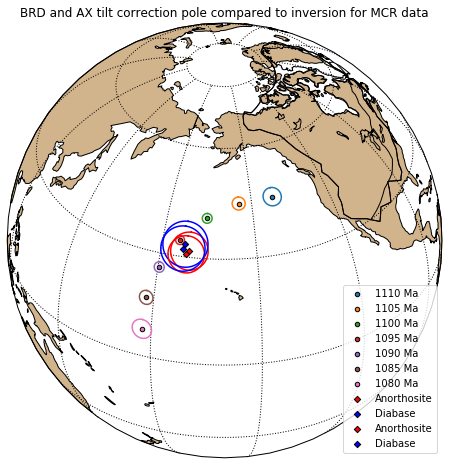

In [28]:
one_Euler_pole_lon = np.loadtxt('../Data/mcplates_results/pole_lon_positions1.txt')
one_Euler_pole_lat = np.loadtxt('../Data/mcplates_results/pole_lat_positions1.txt')

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, AX_site_vgp_tc_mean['dec'], AX_site_vgp_tc_mean['inc'], AX_site_vgp_tc_mean['alpha95'], marker = 'D', color = 'red', label = 'Anorthosite')
ipmag.plot_pole(m, BD_site_vgp_tc_mean['dec'], BD_site_vgp_tc_mean['inc'], BD_site_vgp_tc_mean['alpha95'], marker = 'D', color = 'blue', label = 'Diabase')

ipmag.plot_pole(m, AX_site_vgp_mean_tc['dec'], AX_site_vgp_mean_tc['inc'], AX_site_vgp_mean_tc['alpha95'], marker = 'D', color = 'red', label = 'Anorthosite')
ipmag.plot_pole(m, BD_site_vgp_mean_tc['dec'], BD_site_vgp_mean_tc['inc'], BD_site_vgp_mean_tc['alpha95'], marker = 'D', color = 'blue', label = 'Diabase')

plt.legend(loc = 4)
plt.title('BRD and AX tilt correction pole compared to inversion for MCR data')
# plt.savefig('../Figure/Pmag_plots/BRD_AX_pole_Keweenawan_1e_tc.pdf')
plt.show()

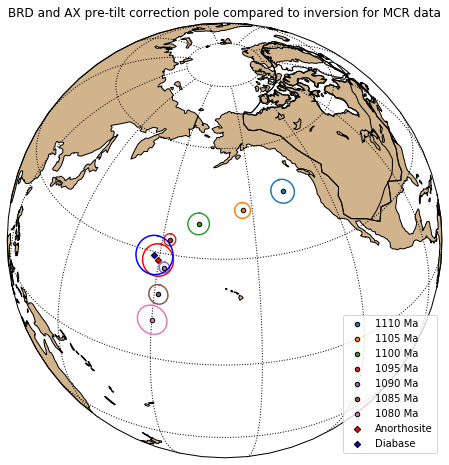

In [29]:
one_Euler_pole_lon = np.loadtxt('../Data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../Data/mcplates_results/pole_lat_positions_2_true.txt')

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, AX_site_vgp_mean['dec'], AX_site_vgp_mean['inc'], AX_site_vgp_mean['alpha95'], marker = 'D', color = 'red', label = 'Anorthosite')
ipmag.plot_pole(m, BD_site_vgp_mean['dec'], BD_site_vgp_mean['inc'], BD_site_vgp_mean['alpha95'], marker = 'D', color = 'blue', label = 'Diabase')

plt.legend(loc = 4)
plt.title('BRD and AX pre-tilt correction pole compared to inversion for MCR data')
# plt.savefig('../Figure/Pmag_plots/BRD_AX_pole_Keweenawan_2e.pdf')
plt.show()

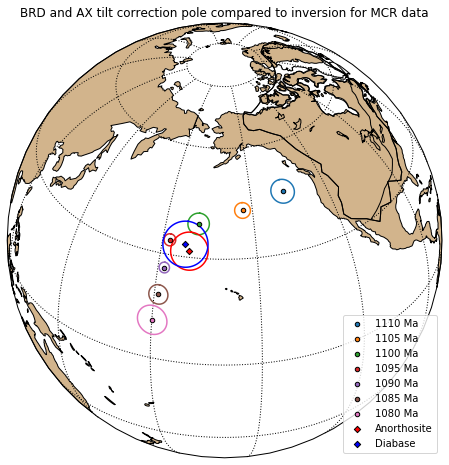

In [30]:
one_Euler_pole_lon = np.loadtxt('../Data/mcplates_results/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../Data/mcplates_results/pole_lat_positions_2_true.txt')

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)
m.add_feature(Laurentia_outline)

plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, AX_site_vgp_tc_mean['dec'], AX_site_vgp_tc_mean['inc'], AX_site_vgp_tc_mean['alpha95'], marker = 'D', color = 'red', label = 'Anorthosite')
ipmag.plot_pole(m, BD_site_vgp_tc_mean['dec'], BD_site_vgp_tc_mean['inc'], BD_site_vgp_tc_mean['alpha95'], marker = 'D', color = 'blue', label = 'Diabase')

plt.legend(loc = 4)
plt.title('BRD and AX tilt correction pole compared to inversion for MCR data')
# plt.savefig('../Figure/Pmag_plots/BRD_AX_pole_Keweenawan_2e_tc.pdf')
plt.show()

## Compare diabase and anorthosite thermal demagnetization spectrum

In [31]:
AX_demag_measurements = pd.read_csv('../Data/Demag/AX_demag/measurements.txt', sep='\t', header = 1) 
AX_demag_measurements.head()

,measurement,specimen,experiment,dir_csd,dir_dec,dir_inc,treat_ac_field,treat_dc_field,treat_dc_field_phi,treat_dc_field_theta,...,analysts,description,software_packages,magn_moment,magn_x_sigma,magn_y_sigma,magn_z_sigma,sample,site,location
0,AX1-1b_LP-DIR-T-1,AX1-1b,AX1-1b_LP-DIR-T,0.8,209.0,25.6,0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000002,8.160000e-09,1.120000e-08,2.680000e-08,AX1-1,AX1,Beaver Bay Complex
1,AX1-1b_LP-DIR-T-2,AX1-1b,AX1-1b_LP-DIR-T,1.5,213.2,25.6,0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000002,1.710000e-08,4.390000e-08,2.990000e-08,AX1-1,AX1,Beaver Bay Complex
2,AX1-1b_LP-DIR-T-3,AX1-1b,AX1-1b_LP-DIR-T,3.4,211.0,25.6,0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000002,4.430000e-08,1.060000e-07,2.740000e-08,AX1-1,AX1,Beaver Bay Complex
3,AX1-1b_LP-DIR-T-4,AX1-1b,AX1-1b_LP-DIR-T,4.7,216.2,25.8,0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000002,7.830000e-08,1.380000e-07,2.520000e-08,AX1-1,AX1,Beaver Bay Complex
4,AX1-1b_LP-DIR-T-5,AX1-1b,AX1-1b_LP-DIR-T,1.9,214.4,25.8,0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000002,2.100000e-08,4.600000e-08,3.690000e-08,AX1-1,AX1,Beaver Bay Complex


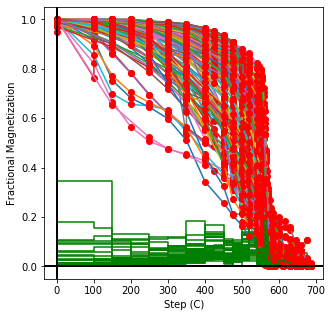

In [32]:
ipmag.plot_dmag(AX_demag_measurements, dmag_key='treat_temp', intensity = 'magn_moment', norm=True, quality=True)

In [33]:
BD_demag_measurements = pd.read_csv('../Data/Demag/BD_demag/measurements.txt', sep='\t', header = 1) 
BD_demag_measurements = BD_demag_measurements[~BD_demag_measurements['measurement'].str.contains('AF')]
BD_demag_measurements.head()

,measurement,specimen,experiment,dir_csd,dir_dec,dir_inc,treat_ac_field,treat_dc_field,treat_dc_field_phi,treat_dc_field_theta,...,analysts,description,software_packages,magn_moment,magn_x_sigma,magn_y_sigma,magn_z_sigma,sample,site,location
570,BD10-10a_LP-DIR-T-571,BD10-10a,BD10-10a_LP-DIR-T,2.6,222.3,19.1,0.0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000003,1.040000e-07,1.190000e-07,2.260000e-08,BD10-10,BD10,Beaver Bay complex
571,BD10-10a_LP-DIR-T-572,BD10-10a,BD10-10a_LP-DIR-T,4.0,221.5,18.5,0.0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000003,1.550000e-07,1.770000e-07,4.270000e-08,BD10-10,BD10,Beaver Bay complex
572,BD10-10a_LP-DIR-T-573,BD10-10a,BD10-10a_LP-DIR-T,4.3,221.9,19.0,0.0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000003,1.560000e-07,1.800000e-07,2.120000e-08,BD10-10,BD10,Beaver Bay complex
573,BD10-10a_LP-DIR-T-574,BD10-10a,BD10-10a_LP-DIR-T,4.0,226.4,19.0,0.0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000003,1.450000e-07,1.420000e-07,1.900000e-08,BD10-10,BD10,Beaver Bay complex
574,BD10-10a_LP-DIR-T-575,BD10-10a,BD10-10a_LP-DIR-T,1.5,222.2,18.8,0.0,0,0,0,...,NaN,NaN,pmagpy-4.2.24-1,0.000003,4.930000e-08,5.140000e-08,2.080000e-08,BD10-10,BD10,Beaver Bay complex


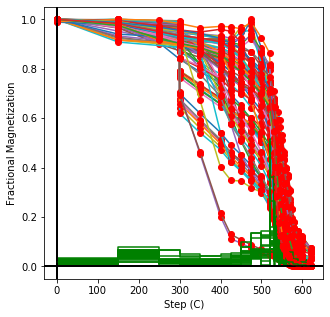

In [34]:
ipmag.plot_dmag(BD_demag_measurements, dmag_key='treat_temp', intensity = 'magn_moment', norm=True, quality=True)

## Compare the fit bounds for diabase and anorthosite specimes

In [35]:
redo_file = pd.read_csv('../Data/Demag/demag_gui.redo', sep='\t', header=None)
redo_file[2] = redo_file[2] - 273
redo_file[3] = redo_file[3] - 273
redo_file = redo_file[redo_file[4] == 'mt']
redo_file = redo_file[redo_file[6] == 'g']
redo_file.head()

,0,1,2,3,4,5,6
0,AX1-1b,DE-BFL,520.0,570.0,mt,#4ED740,g
1,AX1-2b,DE-BFL,475.0,570.0,mt,#4ED740,g
2,AX1-3b,DE-BFL,500.0,570.0,mt,#4ED740,g
3,AX1-4b,DE-BFL,450.0,570.0,mt,#4ED740,g
4,AX1-5b,DE-BFL,500.0,570.0,mt,#4ED740,g


In [36]:
redo_file['unit'] = ['AX' if 'AX' in i else 'BD' for i in redo_file[0]]
redo_file.head()

,0,1,2,3,4,5,6,unit
0,AX1-1b,DE-BFL,520.0,570.0,mt,#4ED740,g,AX
1,AX1-2b,DE-BFL,475.0,570.0,mt,#4ED740,g,AX
2,AX1-3b,DE-BFL,500.0,570.0,mt,#4ED740,g,AX
3,AX1-4b,DE-BFL,450.0,570.0,mt,#4ED740,g,AX
4,AX1-5b,DE-BFL,500.0,570.0,mt,#4ED740,g,AX


In [37]:
AX_redo_file = redo_file[redo_file['unit'] == 'AX']
BD_redo_file = redo_file[redo_file['unit'] == 'BD']

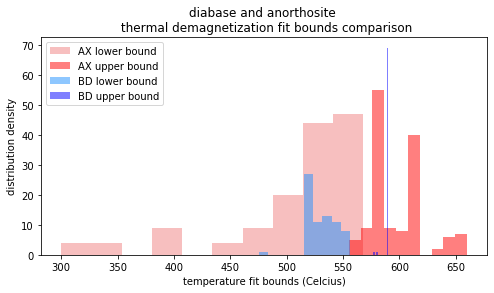

In [38]:
plt.figure(figsize = (8,4,))

plt.hist(AX_redo_file[2].tolist(), bins = 10, color = 'lightcoral', alpha = 0.5, density=False, label = 'AX lower bound')
plt.hist(AX_redo_file[3].tolist(), bins = 10, color = 'red', alpha = 0.5, density=False, label = 'AX upper bound')

plt.hist(BD_redo_file[2].tolist(), bins = 10, color = 'dodgerblue', alpha = 0.5, density=False, label = 'BD lower bound')
plt.hist(BD_redo_file[3].tolist(), bins = 10, color = 'blue', alpha = 0.5, density=False, label = 'BD upper bound')

plt.xlabel('temperature fit bounds (Celcius)')
plt.ylabel('distribution density')
plt.title('diabase and anorthosite \n thermal demagnetization fit bounds comparison')
plt.legend()
plt.show()

## Proportion of anorthosite and diabase that have a lower fit bound >= 500 degree C

In [184]:
sum(AX_redo_file[2] >= 500)/AX_redo_file.shape[0]

0.7872340425531915

In [185]:
sum(BD_redo_file[2] >= 500)/BD_redo_file.shape[0]

0.9859154929577465

## Export pmag tables

In [39]:
AX_data_mt_pre_tilt = AX_site_mct[['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dir_k','dir_alpha95','vgp_lat','vgp_lon']]

In [40]:
AX_data_mt_post_tilt = AX_site_mct_tc[['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dir_k','dir_alpha95','vgp_lat','vgp_lon']]

In [41]:
BD_data_mc_pre_tilt = BD_site_mct[['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dir_k','dir_alpha95','vgp_lat','vgp_lon']]

In [42]:
BD_data_mc_post_tilt = BD_site_mct_tc[['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dir_k','dir_alpha95','vgp_lat','vgp_lon']]

In [43]:
# BD_data_mc_pre_tilt.to_csv('../Data/BD_pmag_pre_tilt.csv')
# BD_data_mc_post_tilt.to_csv('../Data/BD_pmag_post_tilt.csv')
# AX_data_mt_pre_tilt.to_csv('../Data/AX_pmag_pre_tilt.csv')
# AX_data_mt_post_tilt.to_csv('../Data/AX_pmag_post_tilt.csv')

## Using only tilt corrected directions from now on

## Common mean test

This common mean test studies each pair of AX and BRD sites we sampled. We would like to see whether each AX has remanence direction that agree with its own in situ host BRD body. 

Here, pair means AX and BD site taken from same single outcrop, and are in contact with each other.

The pairs are: 
- BD1-AX1-AX2
- BD2-AX3-AX4-AX5-AX6-AX7-AX8-AX9-AX10
- BD3-AX11-AX13
- BD4-AX12-AX14
- BD5-AX15-AX16-AX17-AX18
- BD6-AX19
- BD7-AX20-AX21
- BD10-AX22

Other BD sites, BD8, BD9, BD11, BD12, BD13, BD14, BD15, BD16, BD17 are single standing BD outcrops. 

### Group 1: AX1 and BD1

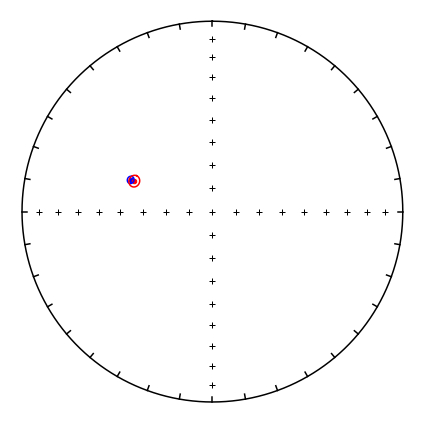

In [111]:
# AX1, AX2 and BD1
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di_mean(float(BD1.dir_dec), float(BD1.dir_inc), float(BD1.dir_alpha95), color = 'blue')
ipmag.plot_di_mean(float(AX1.dir_dec), float(AX1.dir_inc), float(AX1.dir_alpha95), color = 'red')
# ipmag.plot_di_mean(float(AX2.dir_dec), float(AX2.dir_inc), float(AX2.dir_alpha95), color = 'red')
# plt.savefig('../Figure/Pmag_plots/pair1.pdf')
plt.show()

In [45]:
ipmag.common_mean_watson(BD1_blocks, AX1_blocks)

Results of Watson V test: 

Watson's V:           2.7
Critical value of V:  6.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.7
Critical angle for M&M1990:   2.7
The McFadden and McElhinny (1990) classification for
this test is: 'A'


(1, 1.7343737003469235, 2.6625743456949396)

In [46]:
ipmag.common_mean_watson(BD1_blocks, AX2_blocks)

Results of Watson V test: 

Watson's V:           59.9
Critical value of V:  6.9
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 13.2
Critical angle for M&M1990:   4.5



(0, 13.185642473711079, 4.470935398668811)

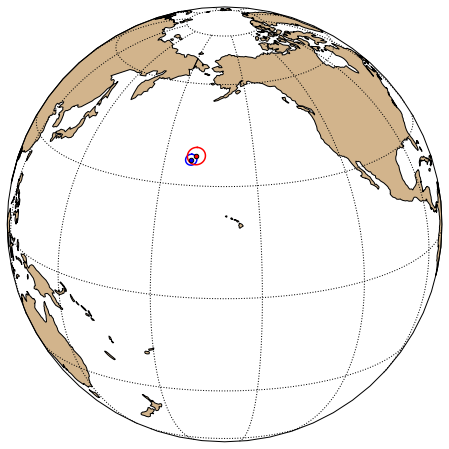

In [47]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_pole(map_axis, float(BD1['vgp_lon']), float(BD1['vgp_lat']), float(BD1['dir_alpha95']), color = 'blue')
ipmag.plot_pole(map_axis, float(AX1['vgp_lon']), float(AX1['vgp_lat']), float(AX1['dir_alpha95']), color = 'r')
# ipmag.plot_pole(map_axis, float(AX2['vgp_lon']), float(AX2['vgp_lat']), float(AX2['dir_alpha95']), color = 'r')

### Group 2: AX3-10, BD2

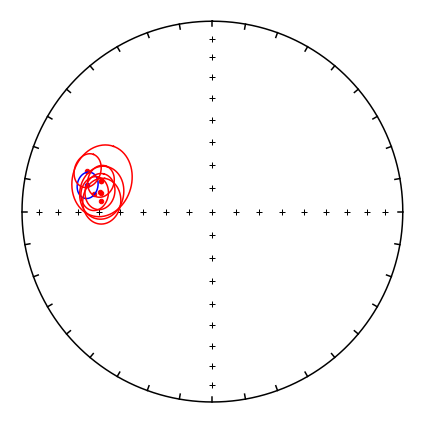

In [48]:
# AX3-10, BD2
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di_mean(float(BD2.dir_dec), float(BD2.dir_inc), float(BD2.dir_alpha95), color = 'blue')
ipmag.plot_di_mean(float(AX3.dir_dec), float(AX3.dir_inc), float(AX3.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX4.dir_dec), float(AX4.dir_inc), float(AX4.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX5.dir_dec), float(AX5.dir_inc), float(AX5.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX6.dir_dec), float(AX6.dir_inc), float(AX6.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX7.dir_dec), float(AX7.dir_inc), float(AX7.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX8.dir_dec), float(AX8.dir_inc), float(AX8.dir_alpha95), color = 'red')
# ipmag.plot_di_mean(float(AX9.dir_dec), float(AX9.dir_inc), float(AX9.dir_alpha95), color = 'red') # has only two specimens, and one with bad orientation, thus has alpha 95 of 180
ipmag.plot_di_mean(float(AX10.dir_dec), float(AX10.dir_inc), float(AX10.dir_alpha95), color = 'red')
# plt.savefig('../Figure/Pmag_plots/pair2.pdf')
plt.show()

In [49]:
ipmag.common_mean_watson(BD2_blocks, AX3_blocks)

Results of Watson V test: 

Watson's V:           4.5
Critical value of V:  6.7
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 6.3
Critical angle for M&M1990:   7.7
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 6.305443746787266, 7.678394925735898)

In [50]:
ipmag.common_mean_watson(BD2_blocks, AX4_blocks)

Results of Watson V test: 

Watson's V:           3.7
Critical value of V:  6.9
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 5.7
Critical angle for M&M1990:   7.7
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 5.673807506026464, 7.683818255008302)

In [51]:
ipmag.common_mean_watson(BD2_blocks, AX5_blocks)

Results of Watson V test: 

Watson's V:           5.0
Critical value of V:  9.5
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 6.5
Critical angle for M&M1990:   9.0
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 6.535958996290427, 8.993575181692854)

In [52]:
ipmag.common_mean_watson(BD2_blocks, AX6_blocks)

Results of Watson V test: 

Watson's V:           6.1
Critical value of V:  7.5
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 6.5
Critical angle for M&M1990:   7.2
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 6.48583162470858, 7.220017496911047)

In [53]:
ipmag.common_mean_watson(BD2_blocks, AX7_blocks)

Results of Watson V test: 

Watson's V:           8.6
Critical value of V:  8.1
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 7.3
Critical angle for M&M1990:   7.1



(0, 7.267919108674262, 7.066562637916799)

In [54]:
ipmag.common_mean_watson(BD2_blocks, AX8_blocks)

Results of Watson V test: 

Watson's V:           9.5
Critical value of V:  8.1
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 9.3
Critical angle for M&M1990:   8.6



(0, 9.291083630420832, 8.577102441871663)

In [55]:
ipmag.common_mean_watson(BD2_blocks, AX10_blocks)

Results of Watson V test: 

Watson's V:           3.6
Critical value of V:  7.4
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 4.8
Critical angle for M&M1990:   6.9
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 4.792177941788036, 6.90216255724753)

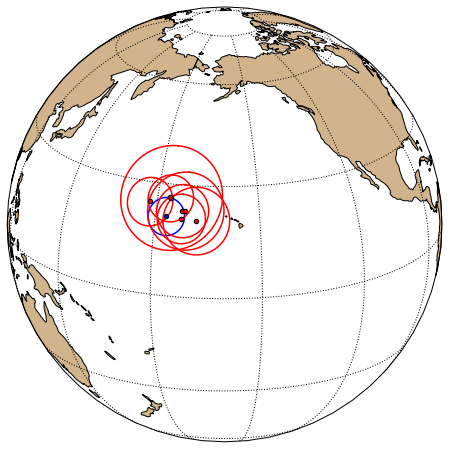

In [56]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_pole(map_axis, float(BD2['vgp_lon']), float(BD2['vgp_lat']), float(BD2['dir_alpha95']), color = 'blue')
ipmag.plot_pole(map_axis, float(AX3['vgp_lon']), float(AX3['vgp_lat']), float(AX3['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX4['vgp_lon']), float(AX4['vgp_lat']), float(AX4['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX5['vgp_lon']), float(AX5['vgp_lat']), float(AX5['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX6['vgp_lon']), float(AX6['vgp_lat']), float(AX6['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX7['vgp_lon']), float(AX7['vgp_lat']), float(AX7['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX8['vgp_lon']), float(AX8['vgp_lat']), float(AX8['dir_alpha95']), color = 'r')
# ipmag.plot_pole(map_axis, float(AX9['vgp_lon']), float(AX9['vgp_lat']), float(AX9['dir_alpha95']), color = 'r')# has only two specimens, and one with bad orientation, thus has alpha 95 of 180
ipmag.plot_pole(map_axis, float(AX10['vgp_lon']), float(AX10['vgp_lat']), float(AX10['dir_alpha95']), color = 'r')
plt.show()

_Now lets try to treat site AX5-AX10 as one site_

In [57]:
AX5_AX10_mean = ipmag.fisher_mean(AX5_AX10['dir_dec'].tolist(), AX5_AX10['dir_inc'].tolist())
AX5_AX10_vgp_mean = ipmag.fisher_mean(AX5_AX10['vgp_lon'].tolist(), AX5_AX10['vgp_lat'].tolist())

ipmag.print_direction_mean(AX5_AX10_mean)
ipmag.print_pole_mean(AX5_AX10_vgp_mean)

Dec: 282.3  Inc: 37.8
Number of directions in mean (n): 6
Angular radius of 95% confidence (a_95): 5.9
Precision parameter (k) estimate: 129.9
Plon: 185.4  Plat: 23.6
Number of directions in mean (n): 6
Angular radius of 95% confidence (A_95): 5.7
Precision parameter (k) estimate: 140.4


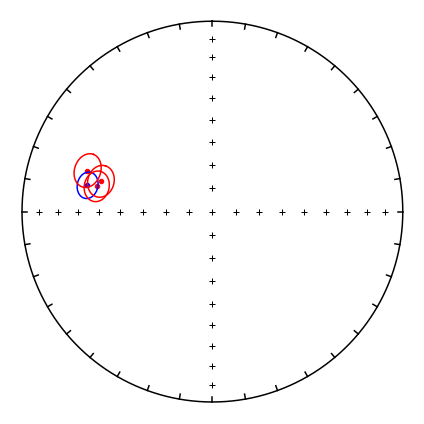

In [58]:
# AX3-10, BD2
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di_mean(float(BD2.dir_dec), float(BD2.dir_inc), float(BD2.dir_alpha95), color = 'blue')
ipmag.plot_di_mean(float(AX5_AX10_mean['dec']), float(AX5_AX10_mean['inc']), float(AX5_AX10_mean['alpha95']), color = 'red')
ipmag.plot_di_mean(float(AX3.dir_dec), float(AX3.dir_inc), float(AX3.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX4.dir_dec), float(AX4.dir_inc), float(AX4.dir_alpha95), color = 'red')
# plt.savefig('../Figure/Pmag_plots/pair2_concat.pdf')
plt.show()

In [59]:
ipmag.common_mean_watson(BD2_blocks, AX5_10_blocks)

Results of Watson V test: 

Watson's V:           6.3
Critical value of V:  6.8
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 5.5
Critical angle for M&M1990:   5.7
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 5.506941990825442, 5.729072216798209)

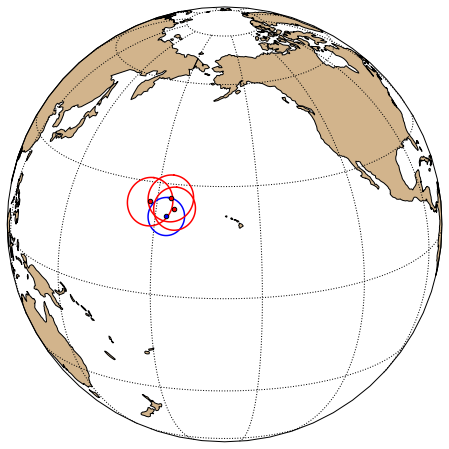

In [60]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_pole(map_axis, float(BD2['vgp_lon']), float(BD2['vgp_lat']), float(BD2['dir_alpha95']), color = 'blue')
ipmag.plot_pole(map_axis, float(AX5_AX10_vgp_mean['dec']), float(AX5_AX10_vgp_mean['inc']), float(AX5_AX10_vgp_mean['alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX3['vgp_lon']), float(AX3['vgp_lat']), float(AX3['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX4['vgp_lon']), float(AX4['vgp_lat']), float(AX4['dir_alpha95']), color = 'r')
plt.show()

### Group 3: AX11, AX13, BD3

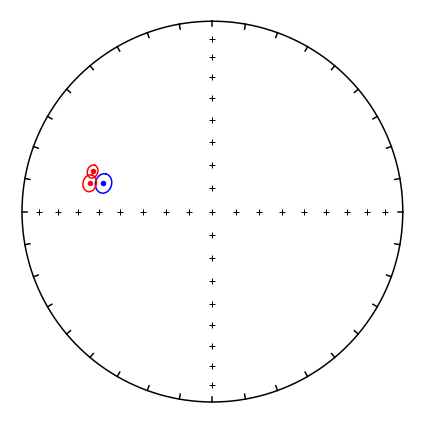

In [61]:
# AX11, AX13, BD3
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di_mean(float(BD3.dir_dec), float(BD3.dir_inc), float(BD3.dir_alpha95), color = 'blue')
ipmag.plot_di_mean(float(AX11.dir_dec), float(AX11.dir_inc), float(AX11.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX13.dir_dec), float(AX13.dir_inc), float(AX13.dir_alpha95), color = 'red')
# plt.savefig('../Figure/Pmag_plots/pair3.pdf')
plt.show()

In [62]:
ipmag.common_mean_watson(BD3_blocks, AX11_blocks)

Results of Watson V test: 

Watson's V:           12.8
Critical value of V:  6.6
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 6.5
Critical angle for M&M1990:   4.6



(0, 6.470745021644401, 4.645932897782165)

In [63]:
ipmag.common_mean_watson(BD3_blocks, AX13_blocks)

Results of Watson V test: 

Watson's V:           19.5
Critical value of V:  6.7
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 7.4
Critical angle for M&M1990:   4.3



(0, 7.367236291350053, 4.31368778692325)

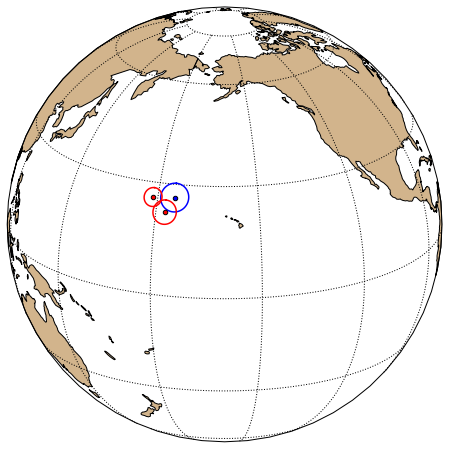

In [64]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_pole(map_axis, float(BD3['vgp_lon']), float(BD3['vgp_lat']), float(BD3['dir_alpha95']), color = 'blue')
ipmag.plot_pole(map_axis, float(AX11['vgp_lon']), float(AX11['vgp_lat']), float(AX11['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX13['vgp_lon']), float(AX13['vgp_lat']), float(AX13['dir_alpha95']), color = 'r')

### Group 4: AX12, AX14, BD4

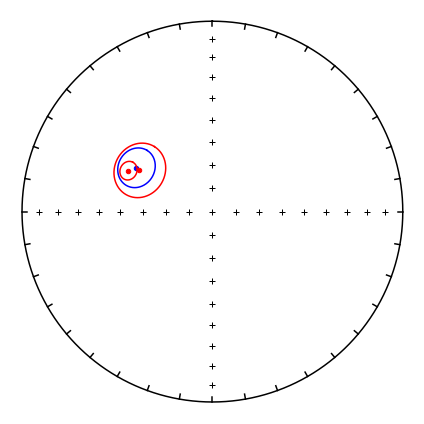

In [65]:
# AX12, AX14, BD4
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di_mean(float(BD4.dir_dec), float(BD4.dir_inc), float(BD4.dir_alpha95), color = 'blue')
ipmag.plot_di_mean(float(AX12.dir_dec), float(AX12.dir_inc), float(AX12.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX14.dir_dec), float(AX14.dir_inc), float(AX14.dir_alpha95), color = 'red')
# plt.savefig('../Figure/Pmag_plots/pair4.pdf')
plt.show()

In [66]:
 ipmag.common_mean_watson(BD4_blocks, AX12_blocks)

Results of Watson V test: 

Watson's V:           0.1
Critical value of V:  6.8
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.9
Critical angle for M&M1990:   12.9
The McFadden and McElhinny (1990) classification for
this test is: 'C'


(1, 1.875183398774482, 12.901795139309074)

In [67]:
 ipmag.common_mean_watson(BD4_blocks, AX14_blocks)

Results of Watson V test: 

Watson's V:           1.2
Critical value of V:  6.9
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.5
Critical angle for M&M1990:   8.6
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.5320863106675757, 8.634898785892775)

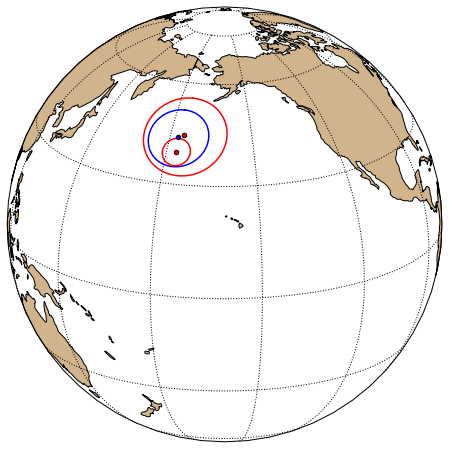

In [68]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_pole(map_axis, float(BD4['vgp_lon']), float(BD4['vgp_lat']), float(BD4['dir_alpha95']), color = 'blue')
ipmag.plot_pole(map_axis, float(AX12['vgp_lon']), float(AX12['vgp_lat']), float(AX12['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX14['vgp_lon']), float(AX14['vgp_lat']), float(AX14['dir_alpha95']), color = 'r')

### Group 5: AX15-18, BD5

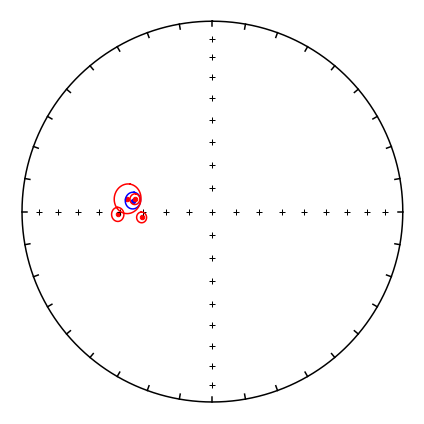

In [69]:
# AX15-18, BD5
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di_mean(float(BD5.dir_dec), float(BD5.dir_inc), float(BD5.dir_alpha95), color = 'blue')
ipmag.plot_di_mean(float(AX15.dir_dec), float(AX15.dir_inc), float(AX15.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX16.dir_dec), float(AX16.dir_inc), float(AX16.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX17.dir_dec), float(AX17.dir_inc), float(AX17.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX18.dir_dec), float(AX18.dir_inc), float(AX18.dir_alpha95), color = 'red')
# plt.savefig('../Figure/Pmag_plots/pair5.pdf')
plt.show()

In [70]:
 ipmag.common_mean_watson(BD5_blocks, AX15_blocks)

Results of Watson V test: 

Watson's V:           1.0
Critical value of V:  6.8
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 2.5
Critical angle for M&M1990:   6.5
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 2.5476340903734487, 6.53790482362061)

In [71]:
 ipmag.common_mean_watson(BD5_blocks, AX16_blocks)

Results of Watson V test: 

Watson's V:           29.9
Critical value of V:  6.6
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 8.7
Critical angle for M&M1990:   4.1



(0, 8.743697494813054, 4.104130104726988)

In [72]:
 ipmag.common_mean_watson(BD5_blocks, AX17_blocks)

Results of Watson V test: 

Watson's V:           28.9
Critical value of V:  6.9
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 7.9
Critical angle for M&M1990:   3.8



(0, 7.893602697910563, 3.8496014422011346)

In [73]:
 ipmag.common_mean_watson(BD5_blocks, AX18_blocks)

Results of Watson V test: 

Watson's V:           0.6
Critical value of V:  6.6
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.1
Critical angle for M&M1990:   3.8
The McFadden and McElhinny (1990) classification for
this test is: 'A'


(1, 1.1041257788816536, 3.794945217741433)

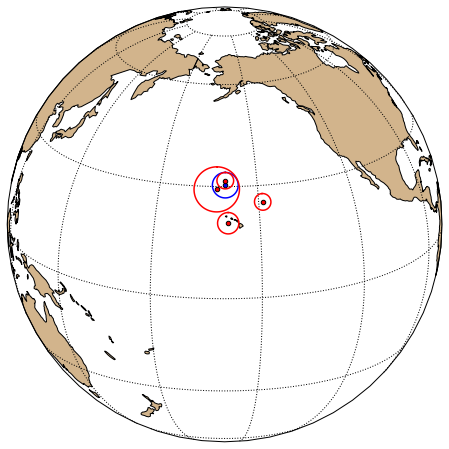

In [74]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_pole(map_axis, float(BD5['vgp_lon']), float(BD5['vgp_lat']), float(BD5['dir_alpha95']), color = 'blue')
ipmag.plot_pole(map_axis, float(AX15['vgp_lon']), float(AX15['vgp_lat']), float(AX15['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX16['vgp_lon']), float(AX16['vgp_lat']), float(AX16['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX17['vgp_lon']), float(AX17['vgp_lat']), float(AX17['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX18['vgp_lon']), float(AX18['vgp_lat']), float(AX18['dir_alpha95']), color = 'r')

### Group 6: AX19, BD6

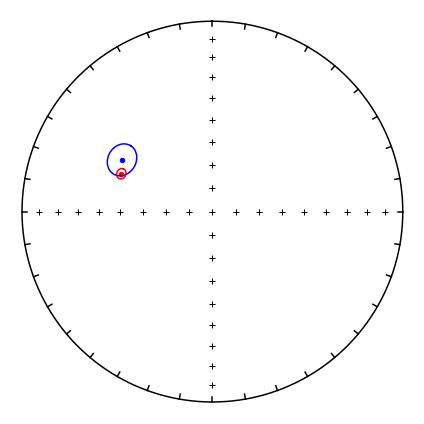

In [75]:
# AX19, BD6
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di_mean(float(BD6.dir_dec), float(BD6.dir_inc), float(BD6.dir_alpha95), color = 'blue')
ipmag.plot_di_mean(float(AX19.dir_dec), float(AX19.dir_inc), float(AX19.dir_alpha95), color = 'red')
# plt.savefig('../Figure/Pmag_plots/pair6.pdf')
plt.show()

In [76]:
 ipmag.common_mean_watson(BD6_blocks, AX19_blocks)

Results of Watson V test: 

Watson's V:           5.0
Critical value of V:  7.0
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 5.6
Critical angle for M&M1990:   6.7
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 5.64074282116079, 6.669933721406374)

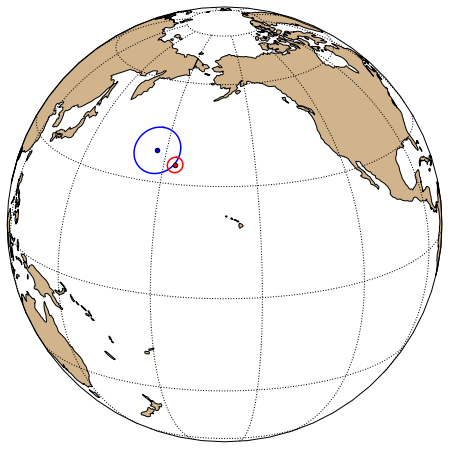

In [77]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_pole(map_axis, float(BD6['vgp_lon']), float(BD6['vgp_lat']), float(BD6['dir_alpha95']), color = 'blue')
ipmag.plot_pole(map_axis, float(AX19['vgp_lon']), float(AX19['vgp_lat']), float(AX19['dir_alpha95']), color = 'r')

### Group 7: AX20, AX21, BD7

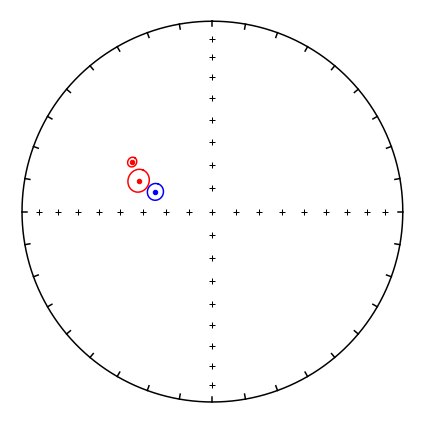

In [78]:
# AX20, AX21, BD7
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di_mean(float(BD7.dir_dec), float(BD7.dir_inc), float(BD7.dir_alpha95), color = 'blue')
ipmag.plot_di_mean(float(AX20.dir_dec), float(AX20.dir_inc), float(AX20.dir_alpha95), color = 'red')
ipmag.plot_di_mean(float(AX21.dir_dec), float(AX21.dir_inc), float(AX21.dir_alpha95), color = 'red')
# plt.savefig('../Figure/Pmag_plots/pair7.pdf')
plt.show()

In [79]:
 ipmag.common_mean_watson(BD7_blocks, AX20_blocks)

Results of Watson V test: 

Watson's V:           19.9
Critical value of V:  7.4
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 8.9
Critical angle for M&M1990:   5.4



(0, 8.892619648387623, 5.433663767211373)

In [80]:
 ipmag.common_mean_watson(BD7_blocks, AX21_blocks)

Results of Watson V test: 

Watson's V:           134.3
Critical value of V:  6.9
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 16.6
Critical angle for M&M1990:   3.8



(0, 16.64124906262351, 3.777048960000543)

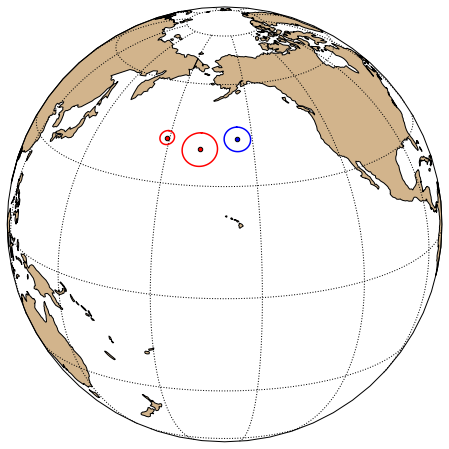

In [81]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_pole(map_axis, float(BD7['vgp_lon']), float(BD7['vgp_lat']), float(BD7['dir_alpha95']), color = 'blue')
ipmag.plot_pole(map_axis, float(AX20['vgp_lon']), float(AX20['vgp_lat']), float(AX20['dir_alpha95']), color = 'r')
ipmag.plot_pole(map_axis, float(AX21['vgp_lon']), float(AX21['vgp_lat']), float(AX21['dir_alpha95']), color = 'r')

### Group 8: AX22, BD10

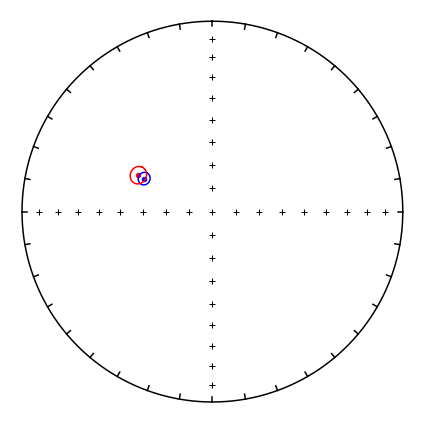

In [82]:
# AX22, BD10
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di_mean(float(BD10.dir_dec), float(BD10.dir_inc), float(BD10.dir_alpha95), color = 'blue')
ipmag.plot_di_mean(float(AX22.dir_dec), float(AX22.dir_inc), float(AX22.dir_alpha95), color = 'red')
# plt.savefig('../Figure/Pmag_plots/pair8.pdf')
plt.show()

In [83]:
ipmag.common_mean_watson(BD10_blocks, AX22_blocks)

Results of Watson V test: 

Watson's V:           3.4
Critical value of V:  6.5
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.0
Critical angle for M&M1990:   4.2
The McFadden and McElhinny (1990) classification for
this test is: 'A'


(1, 3.0373404924922136, 4.213686871109468)

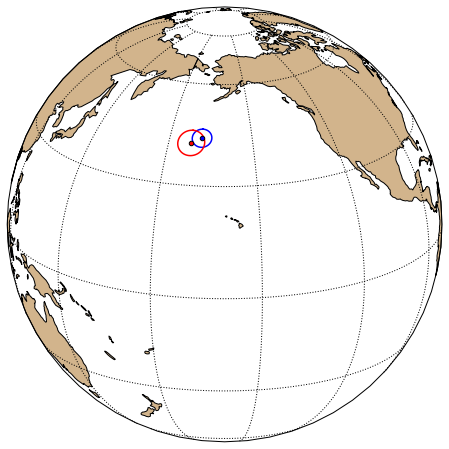

In [84]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_pole(map_axis, float(BD10['vgp_lon']), float(BD10['vgp_lat']), float(BD10['dir_alpha95']), color = 'blue')
ipmag.plot_pole(map_axis, float(AX22['vgp_lon']), float(AX22['vgp_lat']), float(AX22['dir_alpha95']), color = 'r')

### all site common mean test

In [85]:
# site common mean test

All_AX_blocks = ipmag.make_di_block(AX_site_mct_tc['dir_dec'].tolist(), AX_site_mct_tc['dir_inc'].tolist())
All_BD_blocks = ipmag.make_di_block(BD_site_mct_tc['dir_dec'].tolist(), BD_site_mct_tc['dir_inc'].tolist())

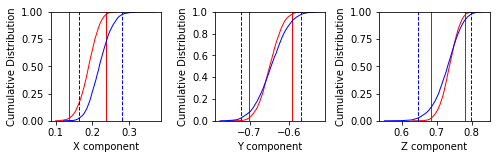

In [86]:
ipmag.common_mean_bootstrap(All_AX_blocks, All_BD_blocks)

In [87]:
ipmag.common_mean_watson(All_AX_blocks, All_BD_blocks)

Results of Watson V test: 

Watson's V:           0.3
Critical value of V:  6.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.7
Critical angle for M&M1990:   8.0
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 1.7495853592297408, 8.009992351451675)

## Combine diabase and anorthosite sites into cooling unit means and construct a mean pole for Beaver River diabase emplacement pole position

<center>
    
| Cooling unit #| AX sites| BD sites | Note |
| :------------- | :----------: | -----------: | -----------: |
| 1 | AX1 | BD1 | This xenolith site is hosted by BD1 diabase site and their directions agree very well|
| 2 | AX3, AX4, AX5, AX6, AX7, AX8, AX9, AX10 | BD2 | All of these xenoliths are hosted by the same Carlton Peak BD2 sill |
| 3 | AX11, AX13 | BD3 | These two anorthosite xenoliths are hosted by the same Kennedy Creek BD3 diabase sill | 
| 4 | AX12, AX14 | BD4 | These two anorthosite xenoliths are in close proximity hosted by BD4 diabase sill |
| 5 | AX15, AX16, AX17, AX18 | BD5 | These anorthosite xenoliths are in close proximity hosted by a Silver Bay BD5 diabase sill |
| 6 | AX19 | BD6 | This xenolith site is hosted by BD6 diabase site and their directions agree very well |
| 7 | AX20 | BD7 | This xenolith site is hosted by BD7 diabase site and their directions agree very well |
| 8 | AX22 | BD10| This xenolith site is hosted by BD10 diabase site and their directions agree very well |
| 9 | AX21 | | This xenolith site is about 300 meters from BD7 diabase, and have a shallower direction than AX20 and BD7 |
| 10 | | BD8 | single diabase site |
| 11 | | BD9 | single diabase site |
| 12 | | BD11 | single diabase site |
| 13 | | BD12 | single diabase site |
| 14 | | BD13 | single diabase site |
| 15 | | BD15 | single diabase site |
| 16 | | BD17 | single diabase site |  
|  | AX2 | | This xenolith is hosted by BD1 but it has an overprint with later secondary oxidation event |
|  | | BD14 | Large overprint, not taken into calculation |
|  | | BD16 | Large overprint, not taken into calculation |
</center>

In [168]:
# pull specimen files in to cooling units (CU)
# all directions are tilt corrected already

CU1 = pd.concat([AX1_specs, BD1_specs])
CU2 = pd.concat([AX3_specs, 
                 AX4_specs, 
                 AX5_specs, 
                 AX6_specs, 
                 AX7_specs, 
                 AX8_specs, 
                 AX9_specs, 
                 AX10_specs, BD2_specs])
CU3 = pd.concat([AX11_specs, AX13_specs, BD3_specs])
CU4 = pd.concat([AX12_specs, AX14_specs, BD4_specs])
CU5 = pd.concat([AX15_specs, 
                 AX16_specs, 
                 AX17_specs, 
                 AX18_specs, BD5_specs])
CU6 = pd.concat([AX19_specs, BD6_specs])
CU7 = pd.concat([AX20_specs, BD7_specs])
CU8 = pd.concat([AX22_specs, BD10_specs])
CU9 = AX21_specs
CU10 = BD8_specs
CU11 = BD9_specs
CU12 = BD11_specs
CU13 = BD12_specs
CU14 = BD13_specs
CU15 = BD15_specs
CU16 = BD17_specs

In [169]:
columns = ['Cooling Unit', 'dec_tc', 'inc_tc', 'alpha95', 'n', 'k']
CU_lons = [-91.379371, -90.856288, -91.167418, -91.26039, -91.26365,
           -91.292925, -91.288383, -91.159176, -91.291029, -91.356198, 
           -91.347111, -91.27416, -91.328796, -91.123713, -90.639617, -91.164446]
CU_lats = [47.200436, 47.582703, 47.368922, 47.291835, 47.288661, 
           47.263413, 47.26661, 47.411406, 47.268486, 47.212553, 
           47.224252, 47.368044, 47.304809, 47.480383, 47.700439, 47.373971]

CU_compilation = pd.DataFrame(columns=columns)
cooling_units = [CU1, CU2, CU3, CU4, CU5, CU6, CU7, CU8, CU9, CU10, CU11, CU12, CU13, CU14, CU15, CU16]

for i in range(len(cooling_units)):
    this_mean = ipmag.fisher_mean(cooling_units[i]['dir_dec'].tolist(), cooling_units[i]['dir_inc'].tolist())
#     print(i, this_mean)
    CU_compilation = CU_compilation.append(pd.DataFrame([['CU'+str(i+1), 
                                            this_mean['dec'], this_mean['inc'], 
                                            this_mean['alpha95'], 
                                            this_mean['n'], this_mean['k']]], columns=columns), ignore_index=True)

CU_compilation['lon'] = CU_lons
CU_compilation['lat'] = CU_lats

CU_compilation = ipmag.vgp_calc(CU_compilation, tilt_correction='yes',  
                                    site_lon='lon',
                                    site_lat='lat',
                                    dec_is='dec_tc',
                                    inc_is='inc_tc',)
CU_compilation

,Cooling Unit,dec_tc,inc_tc,alpha95,n,k,lon,lat,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,CU1,291.261595,52.593353,1.260569,23,577.509416,-91.379371,47.200436,33.177287,37.426241,189.443040,-37.426241,9.443040
1,CU2,283.453131,36.499642,2.478237,39,86.427294,-90.856288,47.582703,20.303249,23.787349,183.717572,-23.787349,3.717572
2,CU3,285.465359,36.201018,2.077776,25,195.082224,-91.167418,47.368922,20.100520,24.989120,181.901214,-24.989120,1.901214
3,CU4,298.456838,51.591529,4.081157,21,61.641069,-91.260390,47.291835,32.237639,41.708720,183.784375,-41.708720,3.784375
4,CU5,274.002706,54.634958,1.924825,41,135.443105,-91.263650,47.288661,35.163863,27.508478,201.888091,-27.508478,21.888091
5,CU6,296.471532,45.684184,3.529372,17,103.120540,-91.292925,47.263413,27.116357,37.158839,179.994609,-37.158839,359.994609
6,CU7,290.817531,60.521843,3.460436,12,158.295514,-91.288383,47.266610,41.493841,41.858049,198.656476,-41.858049,18.656476
7,CU8,296.005974,55.895070,2.115736,19,252.594446,-91.159176,47.411406,36.440679,42.533344,189.973403,-42.533344,9.973403
8,CU9,301.747654,48.952182,1.958334,8,801.072244,-91.291029,47.268486,29.865115,42.485419,178.920638,-42.485419,358.920638
9,CU10,282.970214,63.581033,2.795529,10,299.588827,-91.356198,47.212553,45.182955,38.906124,206.679253,-38.906124,26.679253


In [170]:
# overall direction mean 
CU_direction_mean = ipmag.fisher_mean(CU_compilation['dec_tc'].tolist(), CU_compilation['inc_tc'].tolist())
CU_direction_mean

{'dec': 289.3166752021417,
 'inc': 46.74122417197668,
 'n': 16,
 'r': 15.598229464418154,
 'k': 37.33474376929337,
 'alpha95': 6.117102637154543,
 'csd': 13.25648642225758}

In [171]:
# overall pole mean 
CU_pole_mean = ipmag.fisher_mean(CU_compilation['vgp_lon'].tolist(), CU_compilation['vgp_lat'].tolist())
CU_pole_mean

{'dec': 186.8043685232661,
 'inc': 33.50542155064646,
 'n': 16,
 'r': 15.663708331617274,
 'k': 44.60413804521862,
 'alpha95': 5.584326050351648,
 'csd': 12.128230528424352}

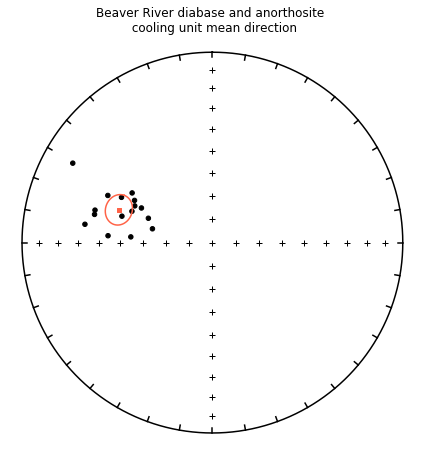

In [180]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(dec=CU_compilation['dec_tc'].tolist(), inc=CU_compilation['inc_tc'].tolist(), color = 'k')

ipmag.plot_di_mean(CU_direction_mean['dec'], CU_direction_mean['inc'], CU_direction_mean['alpha95'], marker = 's', color = 'tomato')
plt.title('Beaver River diabase and anorthosite \n cooling unit mean direction')
plt.savefig('../Figure/Pmag_plots/cooling_unit_mean.pdf', bbox_inches='tight')
plt.show()

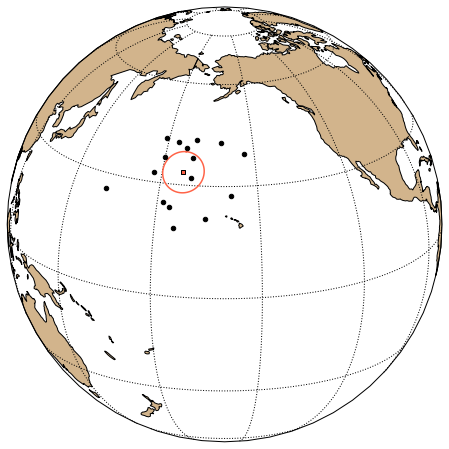

In [173]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)
ipmag.plot_vgp(map_axis, CU_mean_directions['vgp_lon'].tolist(), CU_mean_directions['vgp_lat'].tolist(), color = 'k')
    
ipmag.plot_pole(map_axis, CU_pole_mean['dec'], CU_pole_mean['inc'], CU_pole_mean['alpha95'], marker = 's', color = 'tomato')
plt.show()

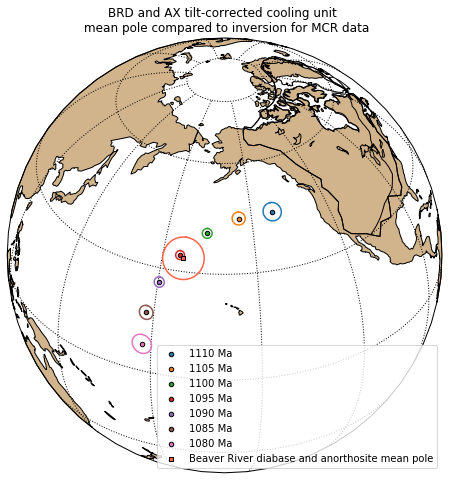

In [177]:
one_Euler_pole_lon = np.loadtxt('../Data/mcplates_results/pole_lon_positions1.txt')
one_Euler_pole_lat = np.loadtxt('../Data/mcplates_results/pole_lat_positions1.txt')

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, CU_pole_mean['dec'], CU_pole_mean['inc'], CU_pole_mean['alpha95'], marker = 's', 
                color = 'tomato', label = 'Beaver River diabase and anorthosite mean pole')
plt.legend(loc = 4)
plt.title('BRD and AX tilt-corrected cooling unit \n mean pole compared to inversion for MCR data')
# plt.savefig('../Figure/Pmag_plots/cooling_unit_mean_pole.pdf', bbox_inches='tight')
plt.show()

## Bring Greenstone Flows on the Keweenaw Peninsula into comparison (Foucher PhD thesis 2018)

In [93]:
Greenstone_sites = pd.read_csv('../Data/Pmag_compiled/Foucher2018a_sites.txt', sep='\t', header=1)
Greenstone_sites = Greenstone_sites[Greenstone_sites['site'].str.contains('GS')]
Greenstone_sites = Greenstone_sites[Greenstone_sites['dir_alpha95'] < 15]
Greenstone_sites = ipmag.vgp_calc(Greenstone_sites,  tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc')

In [94]:
Greenstone_sites_dir_mean = ipmag.fisher_mean(Greenstone_sites['dir_dec'].tolist(), Greenstone_sites['dir_inc'].tolist())
Greenstone_sites_dir_mean

{'dec': 254.5509771864031,
 'inc': 54.59346189588842,
 'n': 17,
 'r': 16.38454343675247,
 'k': 25.996960558149027,
 'alpha95': 7.130774047140653,
 'csd': 15.886335542430494}

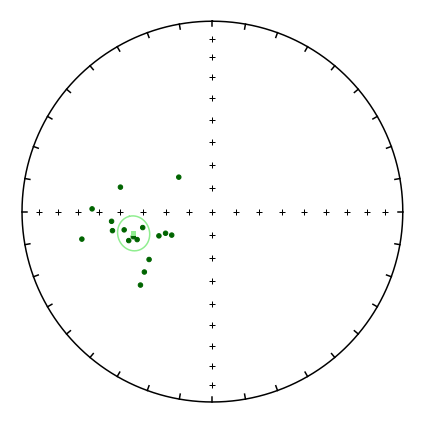

In [95]:
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di(Greenstone_sites['dir_dec'].tolist(), Greenstone_sites['dir_inc'].tolist(), color = 'darkgreen')

ipmag.plot_di_mean(Greenstone_sites_dir_mean['dec'],Greenstone_sites_dir_mean['inc'],Greenstone_sites_dir_mean['alpha95'],
                   color='lightgreen', marker = 's')

# plt.savefig('mc_site_mean_directions.pdf')
plt.show()

In [96]:
Greenstone_sites_vgp_mean = ipmag.fisher_mean(Greenstone_sites['vgp_lon'].tolist(), Greenstone_sites['vgp_lat'].tolist())
Greenstone_sites_vgp_mean

{'dec': 217.76882407719347,
 'inc': 16.99780316608527,
 'n': 17,
 'r': 16.06739392419096,
 'k': 17.15622535068723,
 'alpha95': 8.867163489226282,
 'csd': 19.555735193580546}

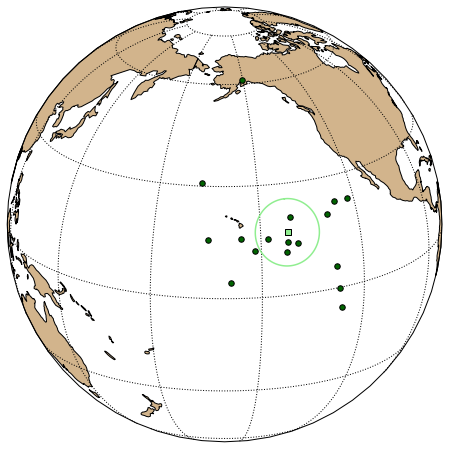

In [97]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_vgp(map_axis, Greenstone_sites['vgp_lon'].tolist(), Greenstone_sites['vgp_lat'].tolist(), 
               color = 'darkgreen', markersize = 30)
ipmag.plot_pole(map_axis, Greenstone_sites_vgp_mean['dec'],Greenstone_sites_vgp_mean['inc'], Greenstone_sites_vgp_mean['alpha95'], 
                color = 'lightgreen', marker = 's', markersize = 30)

plt.show()

**tilt correct the Greenstone Flows:**

In [98]:
Greenstone_sites['dec_tc'] = [pmag.dotilt(Greenstone_sites['dir_dec'].tolist()[i], Greenstone_sites['dir_inc'].tolist()[i], 
                                          Greenstone_sites['dip_trend'].tolist()[i],  Greenstone_sites['dip'].tolist()[i])[0]
                                      for i in range(len(Greenstone_sites['dir_dec']))]
Greenstone_sites['inc_tc'] = [pmag.dotilt(Greenstone_sites['dir_dec'].tolist()[i], Greenstone_sites['dir_inc'].tolist()[i], 
                                          Greenstone_sites['dip_trend'].tolist()[i],  Greenstone_sites['dip'].tolist()[i])[1] 
                                      for i in range(len(Greenstone_sites['dir_dec']))]


In [99]:
Greenstone_sites_tc = ipmag.vgp_calc(Greenstone_sites,  tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='dec_tc',
    inc_is='inc_tc')
Greenstone_sites.head()

,site,location,dir_dec,dir_inc,dec_tc,inc_tc,dir_k,dir_n_samples,dir_n_specimens,dir_n_total_specimens,...,citations,description,dip_trend,dip,width(m),paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
34,GS03,Phoenix,240.0,69.9,289.723420,58.610159,69,5,8,8,...,FoucherPhDthesis,upper ophite,151,-25,NaN,39.333186,40.033351,199.739192,-40.033351,19.739192
35,GS04,Phoenix,245.6,64.8,285.243376,53.670237,71,5,8,8,...,FoucherPhDthesis,upper ophite,151,-25,NaN,34.212840,34.127819,197.169652,-34.127819,17.169652
36,GS02,Phoenix,232.9,55.7,267.417795,51.467585,285,6,10,10,...,FoucherPhDthesis,upper ophite,151,-25,NaN,32.122933,21.441438,206.361447,-21.441438,26.361447
37,GS05,Phoenix,250.9,51.6,275.970768,41.692656,66,5,10,10,...,FoucherPhDthesis,upper ophite,151,-25,NaN,24.006700,21.332787,194.458401,-21.332787,14.458401
38,GS06,Phoenix,245.2,67.9,288.987899,55.901529,64,5,9,9,...,FoucherPhDthesis,upper ophite,151,-25,NaN,36.447327,37.911912,197.114796,-37.911912,17.114796


In [100]:
Greenstone_sites_dir_mean_tc = ipmag.fisher_mean(Greenstone_sites_tc['dec_tc'].tolist(), Greenstone_sites_tc['inc_tc'].tolist())
Greenstone_sites_dir_mean_tc

{'dec': 284.20767955237557,
 'inc': 47.09286740870868,
 'n': 17,
 'r': 16.463970049767628,
 'k': 29.849078382773033,
 'alpha95': 6.638118296972671,
 'csd': 14.825848423181792}

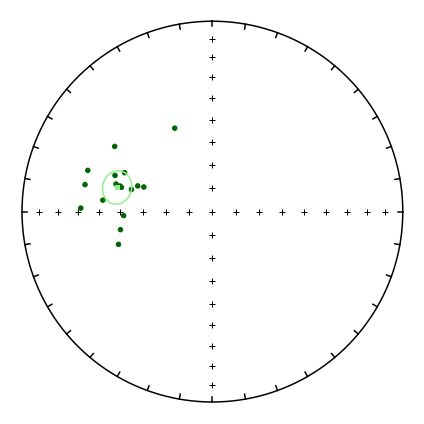

In [101]:
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di(Greenstone_sites_tc['dec_tc'].tolist(), Greenstone_sites_tc['inc_tc'].tolist(), color = 'darkgreen')

ipmag.plot_di_mean(Greenstone_sites_dir_mean_tc['dec'],Greenstone_sites_dir_mean_tc['inc'],Greenstone_sites_dir_mean_tc['alpha95'],
                   color='lightgreen', marker = 's')

# plt.savefig('mc_site_mean_directions.pdf')
plt.show()

In [102]:
Greenstone_sites_tc_vgp_mean = ipmag.fisher_mean(Greenstone_sites_tc['vgp_lon'].tolist(), Greenstone_sites_tc['vgp_lat'].tolist())
Greenstone_sites_tc_vgp_mean

{'dec': 192.9340013775176,
 'inc': 30.113201710929257,
 'n': 17,
 'r': 16.277108215831074,
 'k': 22.133326661603206,
 'alpha95': 7.7545099087872,
 'csd': 17.217166208344803}

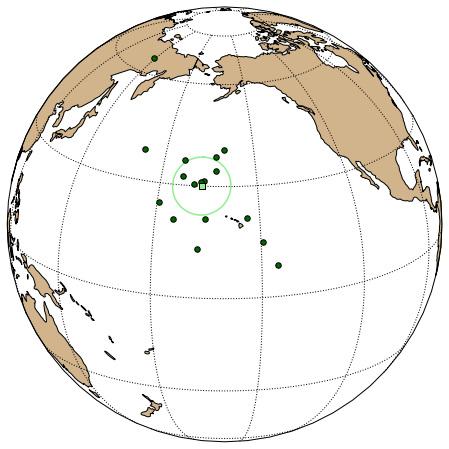

In [103]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_vgp(map_axis, Greenstone_sites_tc['vgp_lon'].tolist(), Greenstone_sites_tc['vgp_lat'].tolist(), 
               color = 'darkgreen', markersize = 30)
ipmag.plot_pole(map_axis, Greenstone_sites_tc_vgp_mean['dec'],Greenstone_sites_tc_vgp_mean['inc'], Greenstone_sites_tc_vgp_mean['alpha95'], 
                color = 'lightgreen', marker = 's', markersize = 30)

plt.show()

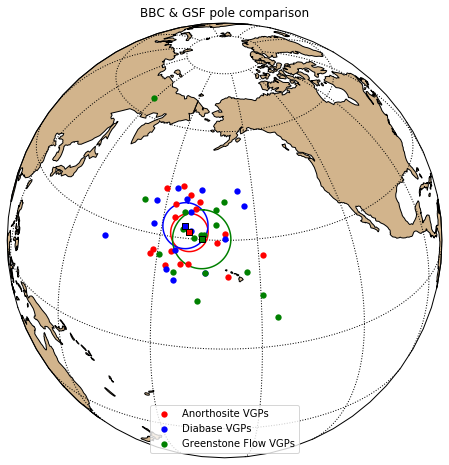

In [104]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30)


ipmag.plot_vgp(map_axis, AX_site_mct_tc['vgp_lon'].tolist(), AX_site_mct_tc['vgp_lat'].tolist(), 
               color = 'red', label = 'Anorthosite VGPs', markersize = 40, edge = 'none')
ipmag.plot_vgp(map_axis, BD_site_mct_tc['vgp_lon'].tolist(), BD_site_mct_tc['vgp_lat'].tolist(), 
               color = 'blue', label = 'Diabase VGPs', markersize = 40, edge = 'none')
ipmag.plot_vgp(map_axis, Greenstone_sites_tc['vgp_lon'].tolist(), Greenstone_sites_tc['vgp_lat'].tolist(), 
               color = 'green', label = 'Greenstone Flow VGPs', markersize = 40, edge = 'none')

ipmag.plot_pole(map_axis, AX_site_vgp_tc_mean['dec'], AX_site_vgp_tc_mean['inc'], AX_site_vgp_tc_mean['alpha95'], 
                color = 'red', marker = 's', markersize = 45)
ipmag.plot_pole(map_axis, BD_site_vgp_tc_mean['dec'], BD_site_vgp_tc_mean['inc'], BD_site_vgp_tc_mean['alpha95'], 
                color = 'blue', marker = 's', markersize = 45)
ipmag.plot_pole(map_axis, Greenstone_sites_tc_vgp_mean['dec'],Greenstone_sites_tc_vgp_mean['inc'], Greenstone_sites_tc_vgp_mean['alpha95'], 
                color = 'green', marker = 's', markersize = 45)


# leg = plt.legend(loc = 8, scatterpoints = 3, prop={'size': 12})
# leg.get_frame().set_edgecolor('black')
plt.title('BBC & GSF pole comparison')
plt.legend(loc = 8)
# plt.savefig('../Figure/Pmag_plots/BRD_AX_GSF_VGP.pdf')
plt.show()

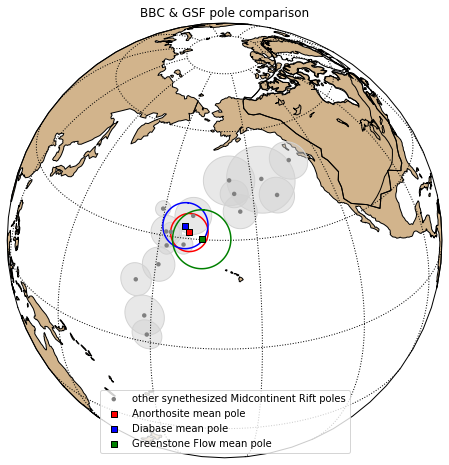

In [105]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30)

map_axis.add_feature(Laurentia_outline)
Kewee_track_2019 = pd.read_csv('../Data/mcplates_results/pole_means.csv')

ipmag.plot_poles(map_axis, Kewee_track_2019['PLon'].tolist(), Kewee_track_2019['PLat'].tolist(), Kewee_track_2019['A95'].tolist(), 
                 color = 'grey', edgecolor = 'none', 
                 filled_pole = True, fill_color = 'lightgrey', fill_alpha = 0.5, label = 'other synethesized Midcontinent Rift poles')
ipmag.plot_pole(map_axis, AX_site_vgp_tc_mean['dec'], AX_site_vgp_tc_mean['inc'], AX_site_vgp_tc_mean['alpha95'], 
                color = 'red', marker = 's', markersize = 45, label = 'Anorthosite mean pole')
ipmag.plot_pole(map_axis, BD_site_vgp_tc_mean['dec'], BD_site_vgp_tc_mean['inc'], BD_site_vgp_tc_mean['alpha95'], 
                color = 'blue', marker = 's', markersize = 45, label = 'Diabase mean pole')
ipmag.plot_pole(map_axis, Greenstone_sites_tc_vgp_mean['dec'],Greenstone_sites_tc_vgp_mean['inc'], Greenstone_sites_tc_vgp_mean['alpha95'], 
                color = 'green', marker = 's', markersize = 45, label = 'Greenstone Flow mean pole')


# leg = plt.legend(loc = 8, scatterpoints = 3, prop={'size': 12})
# leg.get_frame().set_edgecolor('black')
plt.title('BBC & GSF pole comparison')
plt.legend(loc = 8)
# plt.savefig('../Figure/Pmag_plots/BRD_AX_GSF_Keew_1e.pdf')
plt.show()

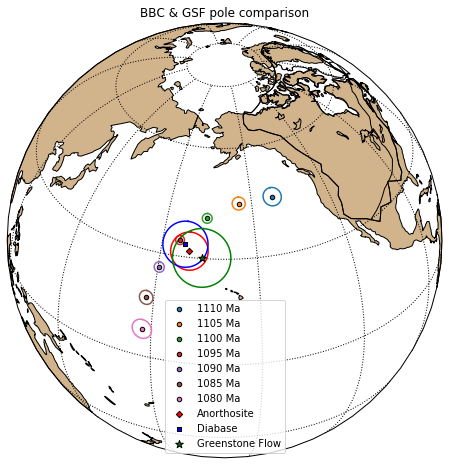

In [106]:
one_Euler_pole_lon = np.loadtxt('../Data/mcplates_results/pole_lon_positions1.txt')
one_Euler_pole_lat = np.loadtxt('../Data/mcplates_results/pole_lat_positions1.txt')

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, AX_site_vgp_tc_mean['dec'], AX_site_vgp_tc_mean['inc'], AX_site_vgp_tc_mean['alpha95'], marker = 'D', color = 'red', label = 'Anorthosite')
ipmag.plot_pole(m, BD_site_vgp_tc_mean['dec'], BD_site_vgp_tc_mean['inc'], BD_site_vgp_tc_mean['alpha95'], marker = 's', color = 'blue', label = 'Diabase')

ipmag.plot_pole(m, Greenstone_sites_tc_vgp_mean['dec'],Greenstone_sites_tc_vgp_mean['inc'], Greenstone_sites_tc_vgp_mean['alpha95'], 
                color = 'green', marker = '*', markersize = 65, label = 'Greenstone Flow')

plt.title('BBC & GSF pole comparison')
plt.legend(loc = 8)
# plt.savefig('../Figure/Pmag_plots/BRD_AX_GSF_Keew_1e.pdf')
plt.show()

In [107]:
# site common mean test

All_GSF_blocks = ipmag.make_di_block(Greenstone_sites_tc['dec_tc'].tolist(), Greenstone_sites_tc['inc_tc'].tolist())

In [108]:
ipmag.common_mean_watson(All_AX_blocks, All_GSF_blocks)

Results of Watson V test: 

Watson's V:           0.2
Critical value of V:  6.4
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.4
Critical angle for M&M1990:   8.1
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 1.4468713760314926, 8.107230763293913)

In [109]:
ipmag.common_mean_watson(All_GSF_blocks, All_BD_blocks)

Results of Watson V test: 

Watson's V:           0.7
Critical value of V:  6.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.1
Critical angle for M&M1990:   9.2
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.111730209975221, 9.174600946475621)